# **Análise exploratória - Séries Temporais**

###  Notebook: `03_03_C2_analise_exploratoria`

## Análise exploratória das séries de dados do cluster 2

---

A partir deste notebook, as análises serão realizadas apenas para o Cluster 2, por ser o mais representativo em termos de arrecadação, 92.38% do total arrecadado no setor econômico. 

___

## 1. Importação das bibliotecas essenciais

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math
import requests
import json
import os
import warnings
import statistics
warnings.filterwarnings("ignore")


## 2. Importação dos datasets

---
O dataset gerado para o cluster2 no notebook `03_02_tratamento_e_limpeza_dos_dados.ipynb` será carregado a seguir para análise e preparo.
___


#### 2.1 Importação dos datasets

In [2]:
dataset_cluster2_series = pd.read_csv("datasets//dataset_cluster2_series.csv")


In [3]:
## Transformando o campo mes em índice


serie_cluster2 = dataset_cluster2_series.drop(['mes'], axis=1)
serie_cluster2.index = dataset_cluster2_series.mes


In [4]:
serie_cluster2.head(20)

indice_pimpf  ipca  taxa_selic  taxa_cambio   ibcbr  \
mes                                                                        
2004-01-01 00:00:00         104.0  0.76       16.32       136.19   98.59   
2004-02-01 00:00:00         103.1  0.61       16.30       139.84   99.45   
2004-03-01 00:00:00         113.0  0.47       16.19       138.89  111.98   
2004-04-01 00:00:00         107.8  0.37       15.96       138.85  107.36   
2004-05-01 00:00:00         108.9  0.51       15.77       148.25  106.03   
2004-06-01 00:00:00         113.1  0.71       15.80       149.04  107.00   
2004-07-01 00:00:00         110.9  0.91       15.77       143.11  111.47   
2004-08-01 00:00:00         113.2  0.69       15.86       140.62  110.65   
2004-09-01 00:00:00         107.6  0.33       16.09       135.23  109.21   
2004-10-01 00:00:00         103.8  0.44       16.41       133.55  108.89   
2004-11-01 00:00:00         108.6  0.69       16.96       129.60  109.59   
2004-12-01 00:00:00         108.9  0.86       17.50       124.90  107.56   
2005-01-01 00:00:00         105.4  0.58       17.93       123.29  103.52   
2005-02-01 00:00:00         103.3  0.59       18.47       118.92  104.00   
2005-03-01 00:00:00         101.0  0.61       18.97       124.02  115.42   
2005-04-01 00:00:00         105.4  0.87       19.32       118.03  112.35   
2005-05-01 00:00:00         104.9  0.49       19.61       111.59  110.86   
2005-06-01 00:00:00         105.6 -0.02       19.75       109.88  111.50   
2005-07-01 00:00:00          99.9  0.25       19.72       108.29  113.15   
2005-08-01 00:00:00         103.5  0.17       19.75       108.07  115.15   

                      tjlp  pib_mensal  preco_brent  desembolso       debitos  \
mes                                                                             
2004-01-01 00:00:00  10.00   1735331.5        31.18      1107.0  7.309702e+08   
2004-02-01 00:00:00  10.00   1746819.2        30.87      2559.0  4.150874e+09   
2004-03-01 00:00:00  10.00   1765492.2        33.80      4302.0  3.778614e+09   
2004-04-01 00:00:00   9.75   1781058.0        33.36      5474.0  4.927327e+09   
2004-05-01 00:00:00   9.75   1800951.1        37.92      5976.0  2.175496e+09   
2004-06-01 00:00:00   9.75   1828299.9        35.19      7338.0  2.078371e+09   
2004-07-01 00:00:00   9.75   1853700.2        38.37      8251.0  2.531327e+09   
2004-08-01 00:00:00   9.75   1878059.7        43.03      8887.0  1.900320e+09   
2004-09-01 00:00:00   9.75   1894202.4        43.38      9562.0  2.038177e+09   
2004-10-01 00:00:00   9.75   1909813.0        49.82     11099.0  2.499241e+09   
2004-11-01 00:00:00   9.75   1933090.2        43.05     12842.0  2.125699e+09   
2004-12-01 00:00:00   9.75   1957751.2        39.64     15526.0  2.509620e+09   
2005-01-01 00:00:00   9.75   1976732.7        44.28      2089.0  2.991476e+09   
2005-02-01 00:00:00   9.75   1994573.0        45.56      3051.0  1.883603e+09   
2005-03-01 00:00:00   9.75   2012678.1        53.08      4797.0  2.541729e+09   
2005-04-01 00:00:00   9.75   2032903.2        51.86      5966.0  2.865775e+09   
2005-05-01 00:00:00   9.75   2050901.0        48.67      7363.0  2.254300e+09   
2005-06-01 00:00:00   9.75   2066440.6        54.31     10274.0  2.480066e+09   
2005-07-01 00:00:00   9.75   2079143.4        57.58     11523.0  3.324323e+09   
2005-08-01 00:00:00   9.75   2097211.1        64.09     13512.0  2.183455e+09   

                      arrecadacao  
mes                                
2004-01-01 00:00:00  6.709728e+09  
2004-02-01 00:00:00  5.844144e+09  
2004-03-01 00:00:00  5.757594e+09  
2004-04-01 00:00:00  7.872113e+09  
2004-05-01 00:00:00  7.156122e+09  
2004-06-01 00:00:00  7.048868e+09  
2004-07-01 00:00:00  8.450281e+09  
2004-08-01 00:00:00  7.101401e+09  
2004-09-01 00:00:00  7.709141e+09  
2004-10-01 00:00:00  8.787191e+09  
2004-11-01 00:00:00  6.845525e+09  
2004-12-01 00:00:00  7.922471e+09  
2005-01-01 00:00:00  9.171569e+09  
2005-02-01 00:00:00  6.97

# 4. Análise exploratória da série referente ao cluster2

---


Algumas decisões tomadas a partir desse ponto tem como referência os modelos a serem utilizados para a análise multivariada de séries temporais: ARIMA/Auto-ARIMA/SARIMAX e Redes Neurais LSTM.



---

<AxesSubplot:xlabel='mes'>

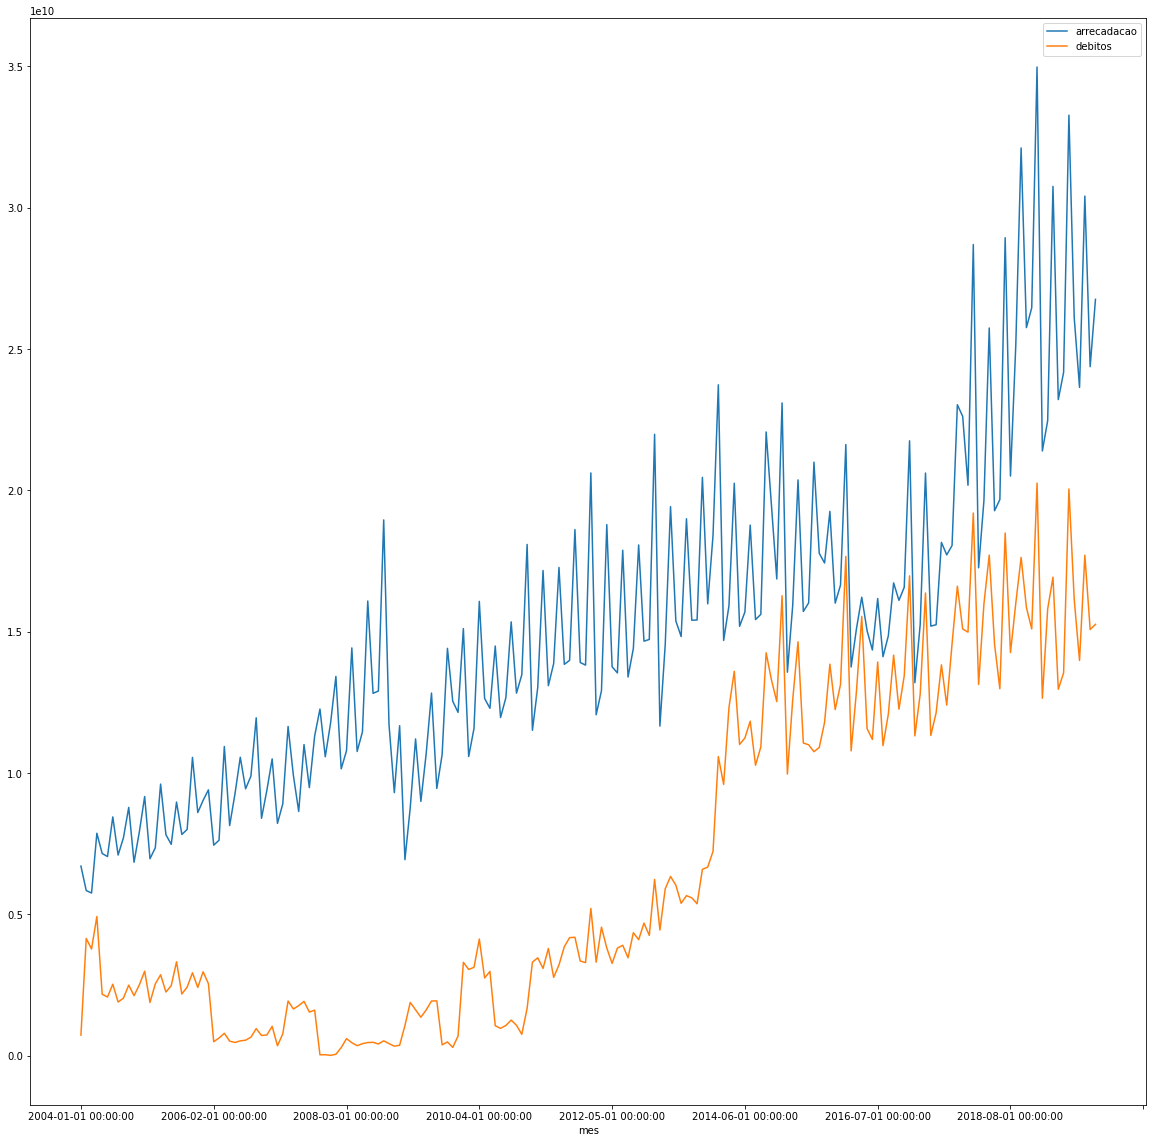

In [5]:
# Plot das séries temporais, separadas por conta das diferenças de escala


serie_cluster2[['arrecadacao','debitos']].plot(figsize=(20,20))

<AxesSubplot:xlabel='mes'>

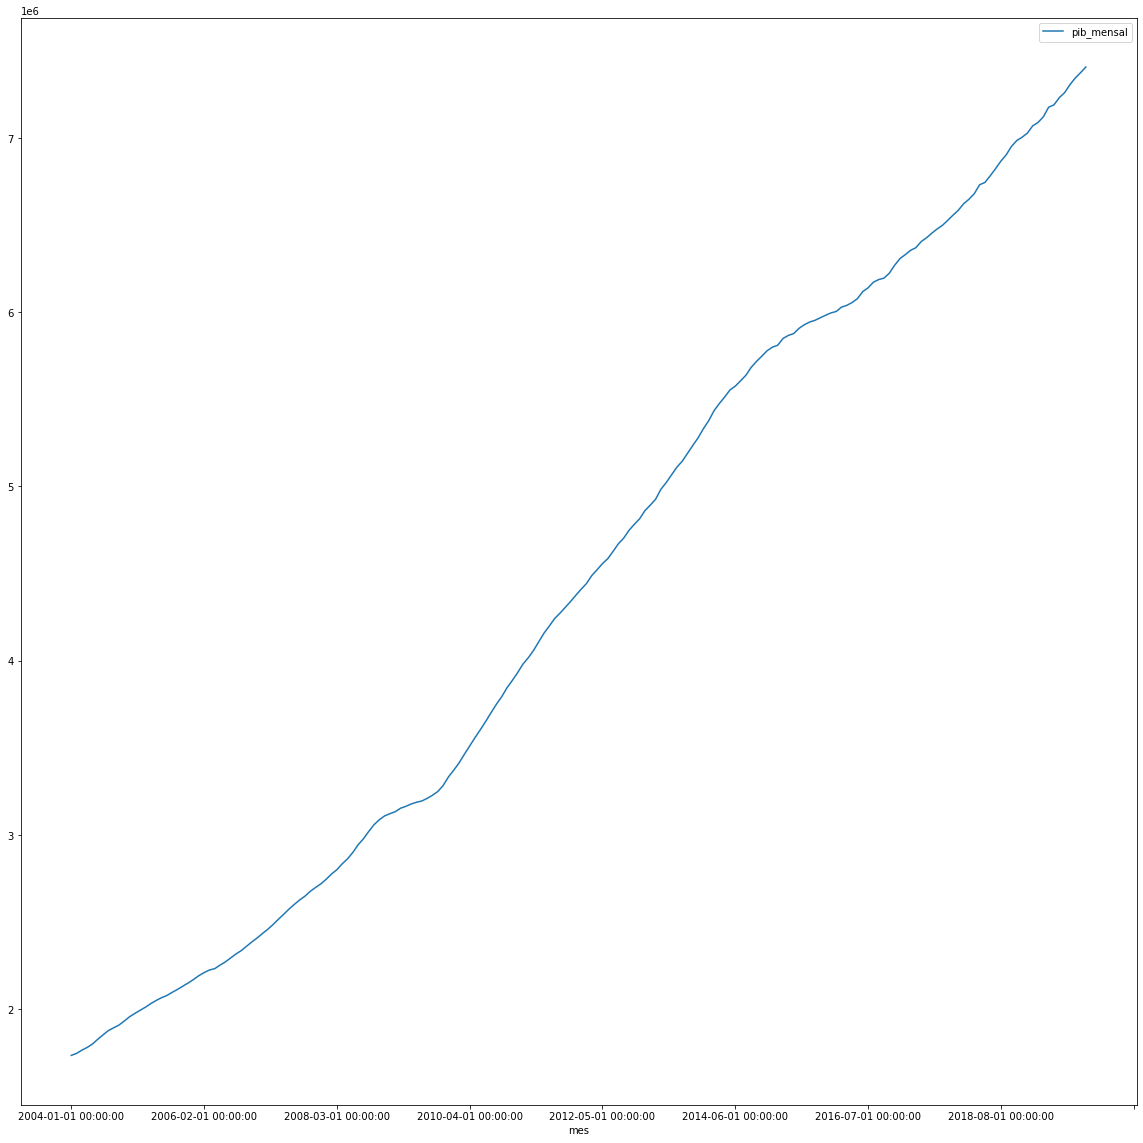

In [6]:
serie_cluster2[['pib_mensal']].plot(figsize=(20,20))

<AxesSubplot:xlabel='mes'>

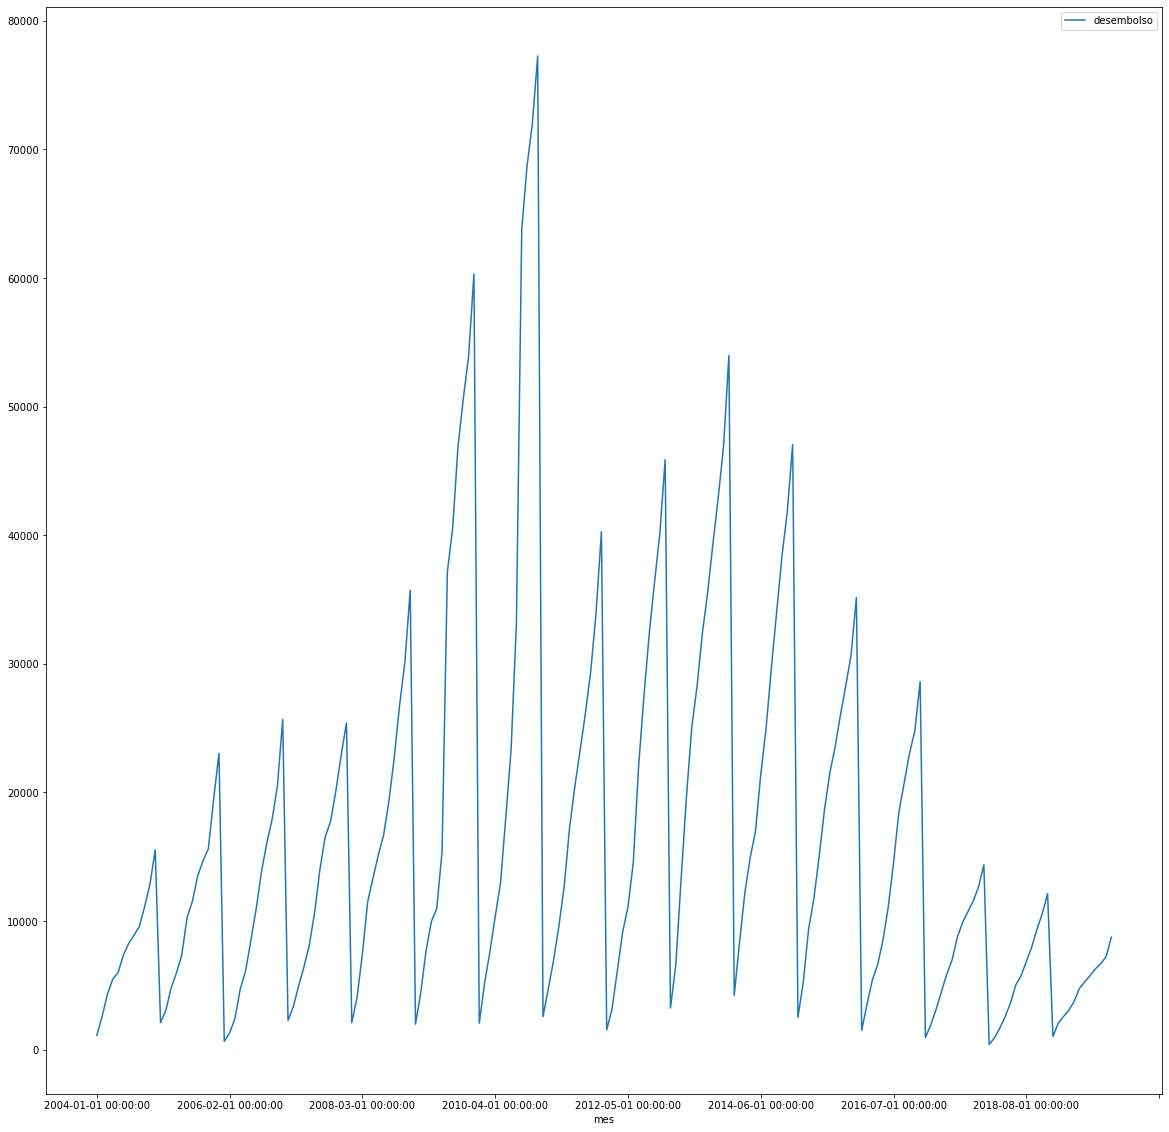

In [7]:

serie_cluster2[['desembolso']].plot(figsize=(20,20))

<AxesSubplot:xlabel='mes'>

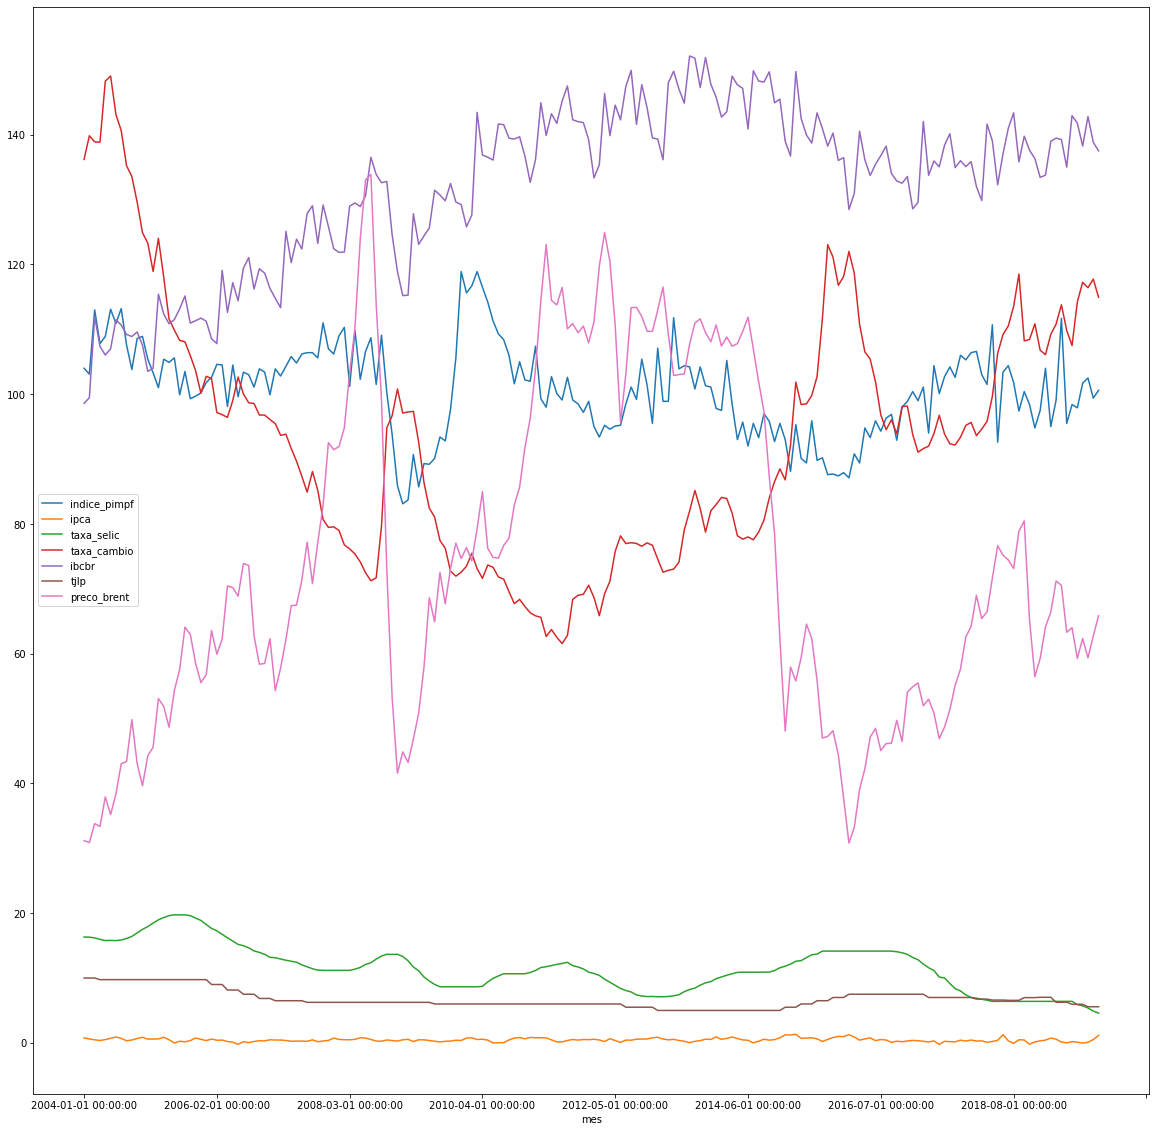

In [8]:
# Plot das séries temporais de indices, separadas por conta das diferenças de escala

serie_cluster2[['indice_pimpf','ipca','taxa_selic', 'taxa_cambio', 'ibcbr','tjlp','preco_brent']].plot(figsize=(20,20))

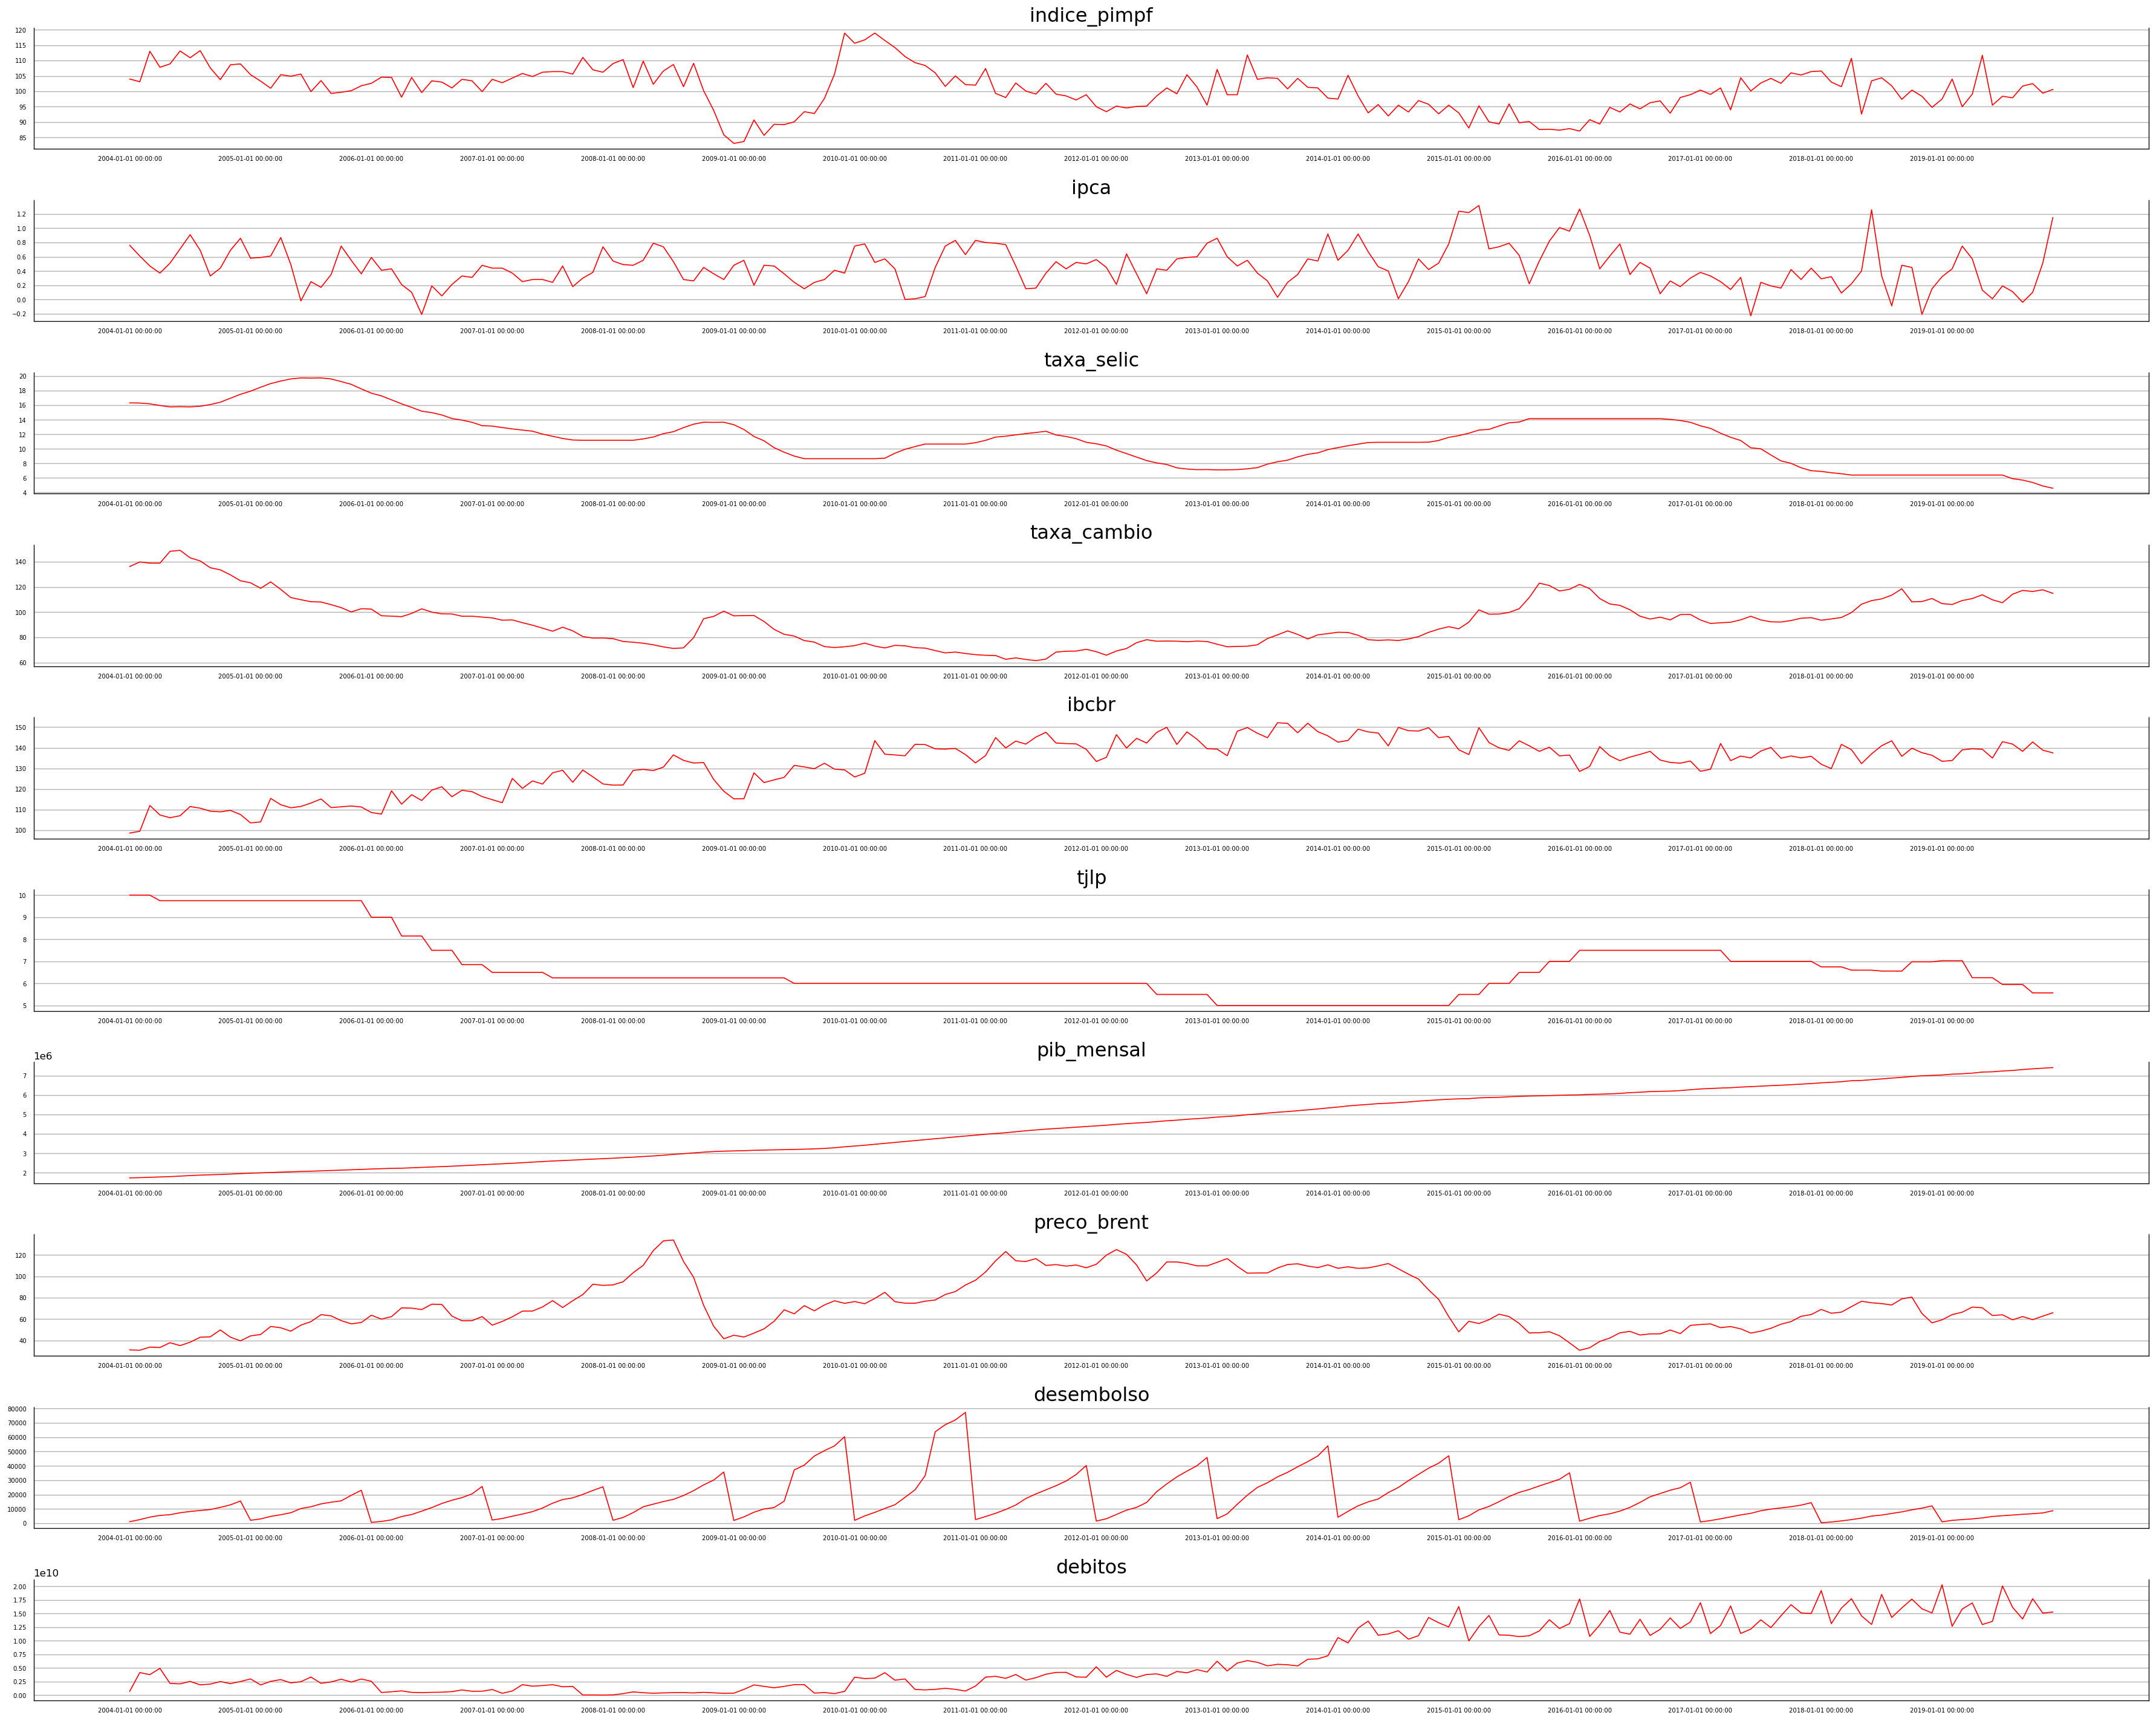

In [9]:
# Plot

df = serie_cluster2.copy()
fig, axes = plt.subplots(nrows=10, ncols=1, dpi=120, figsize=(30,24))
for i, ax in enumerate(axes.flatten()):
    plt.rcParams.update({'font.size': 16})
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()

plt.tight_layout();

## 4.1 Decomposição das séries

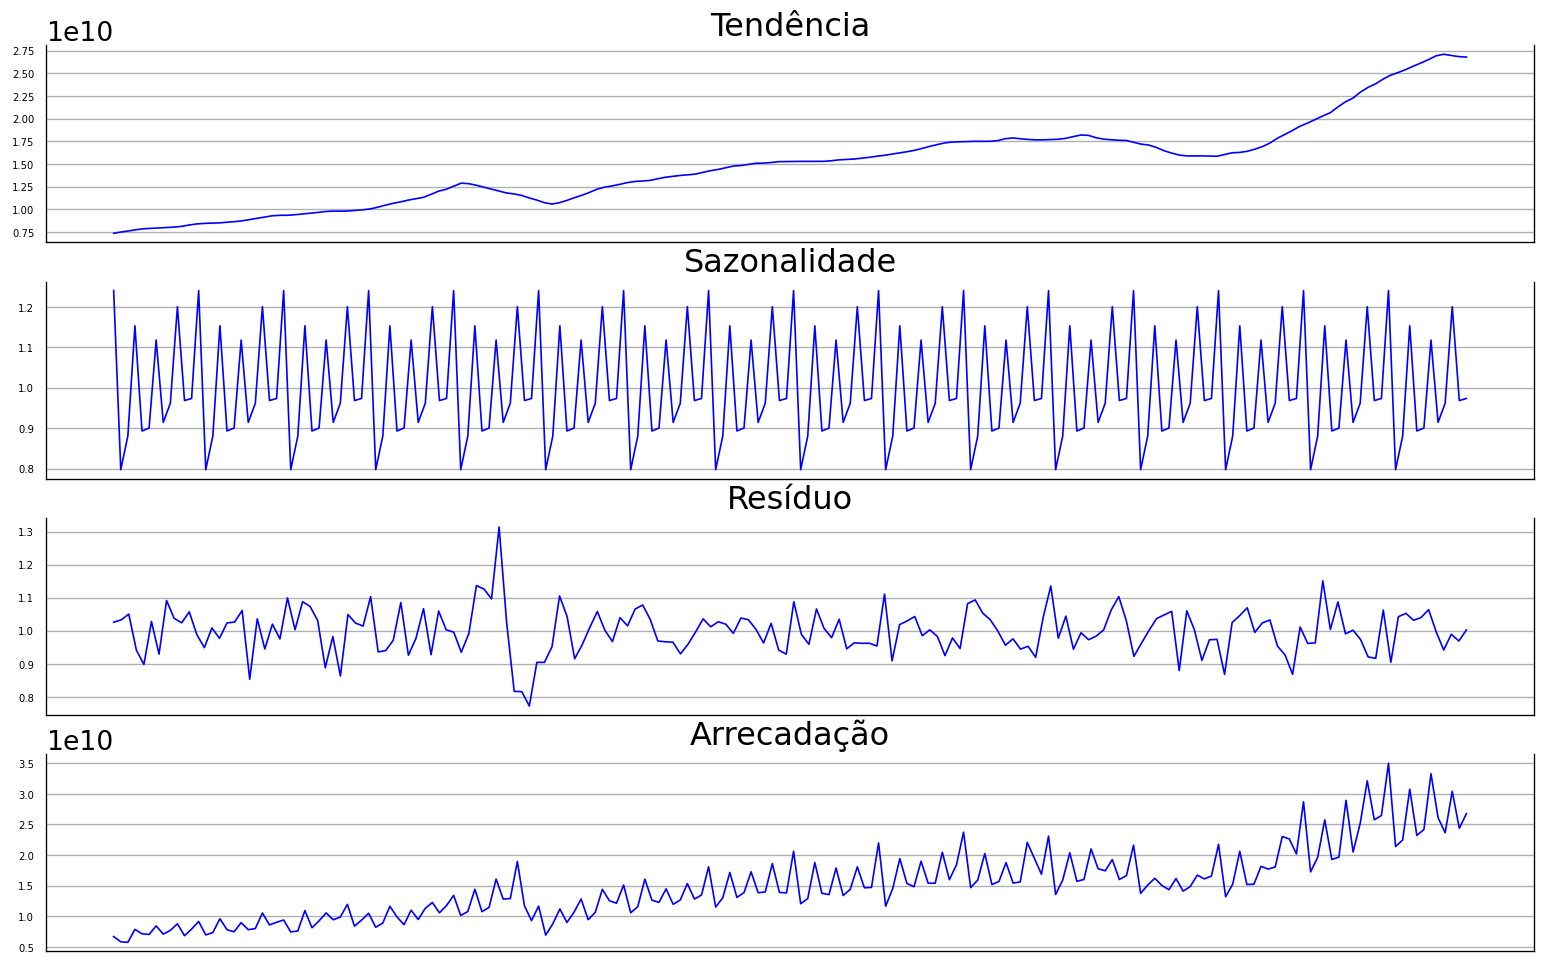

In [10]:
import statsmodels.api as sm

seas_d=sm.tsa.seasonal_decompose(serie_cluster2['arrecadacao'],model='multiplicative',freq=12);

result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['Arrecadação']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()


plt.show()

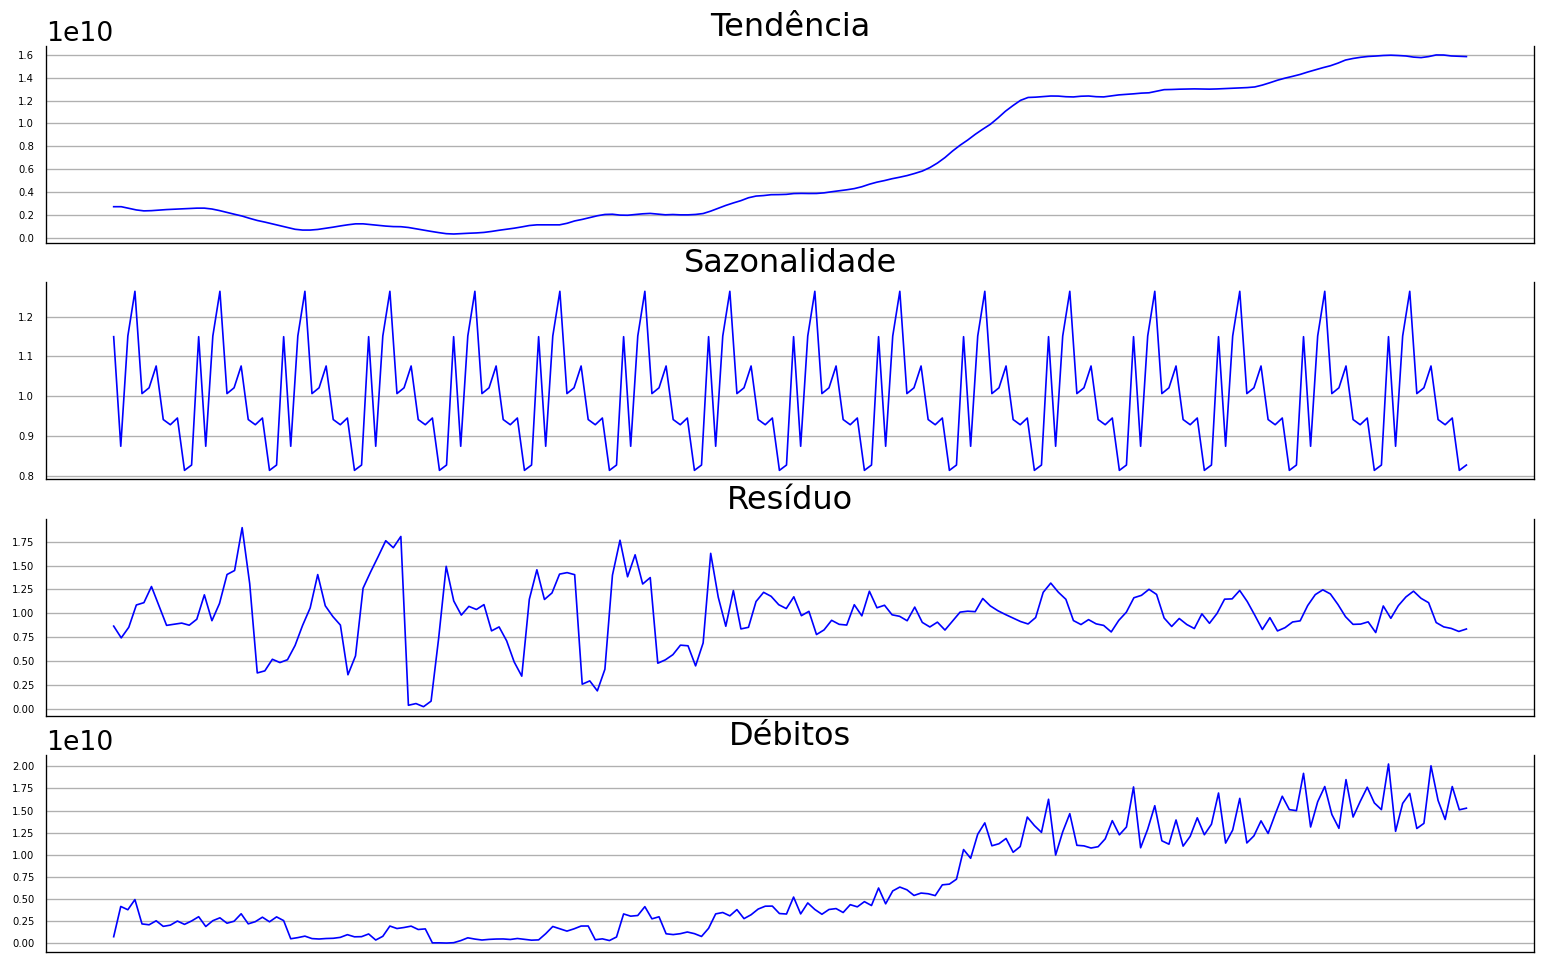

In [11]:
import statsmodels.api as sm

seas_d=sm.tsa.seasonal_decompose(serie_cluster2['debitos'],model='multiplicative',freq=12);

result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['Débitos']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()


plt.show()

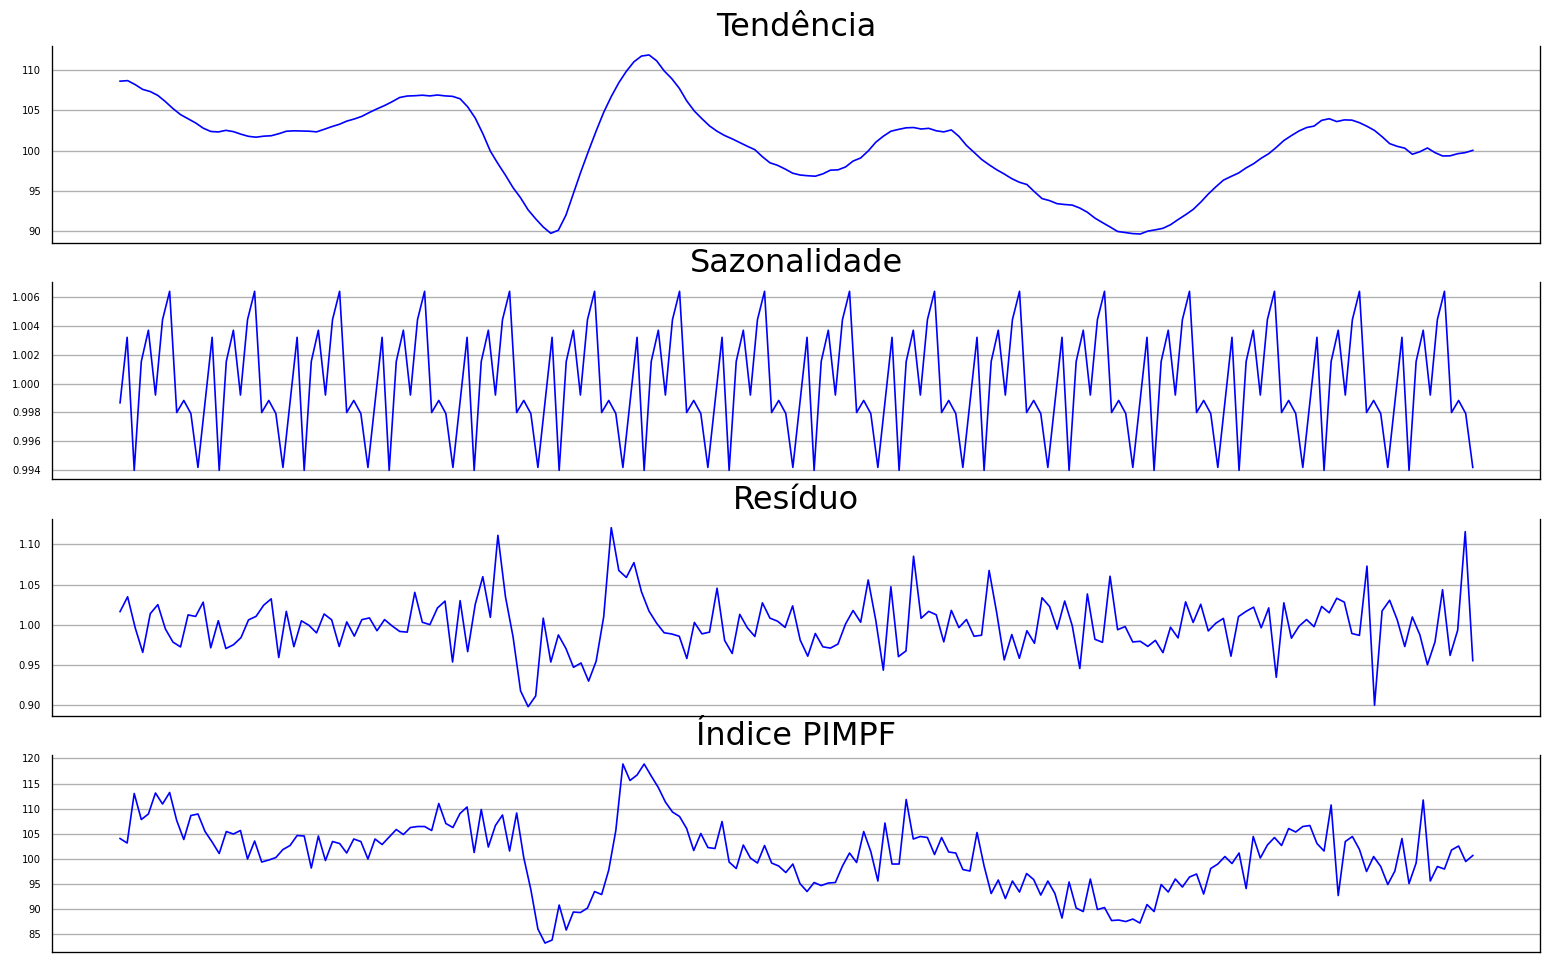

In [12]:
seas_d=sm.tsa.seasonal_decompose(serie_cluster2['indice_pimpf'],model='multiplicative',freq=12);

result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['Índice PIMPF']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()



plt.show()

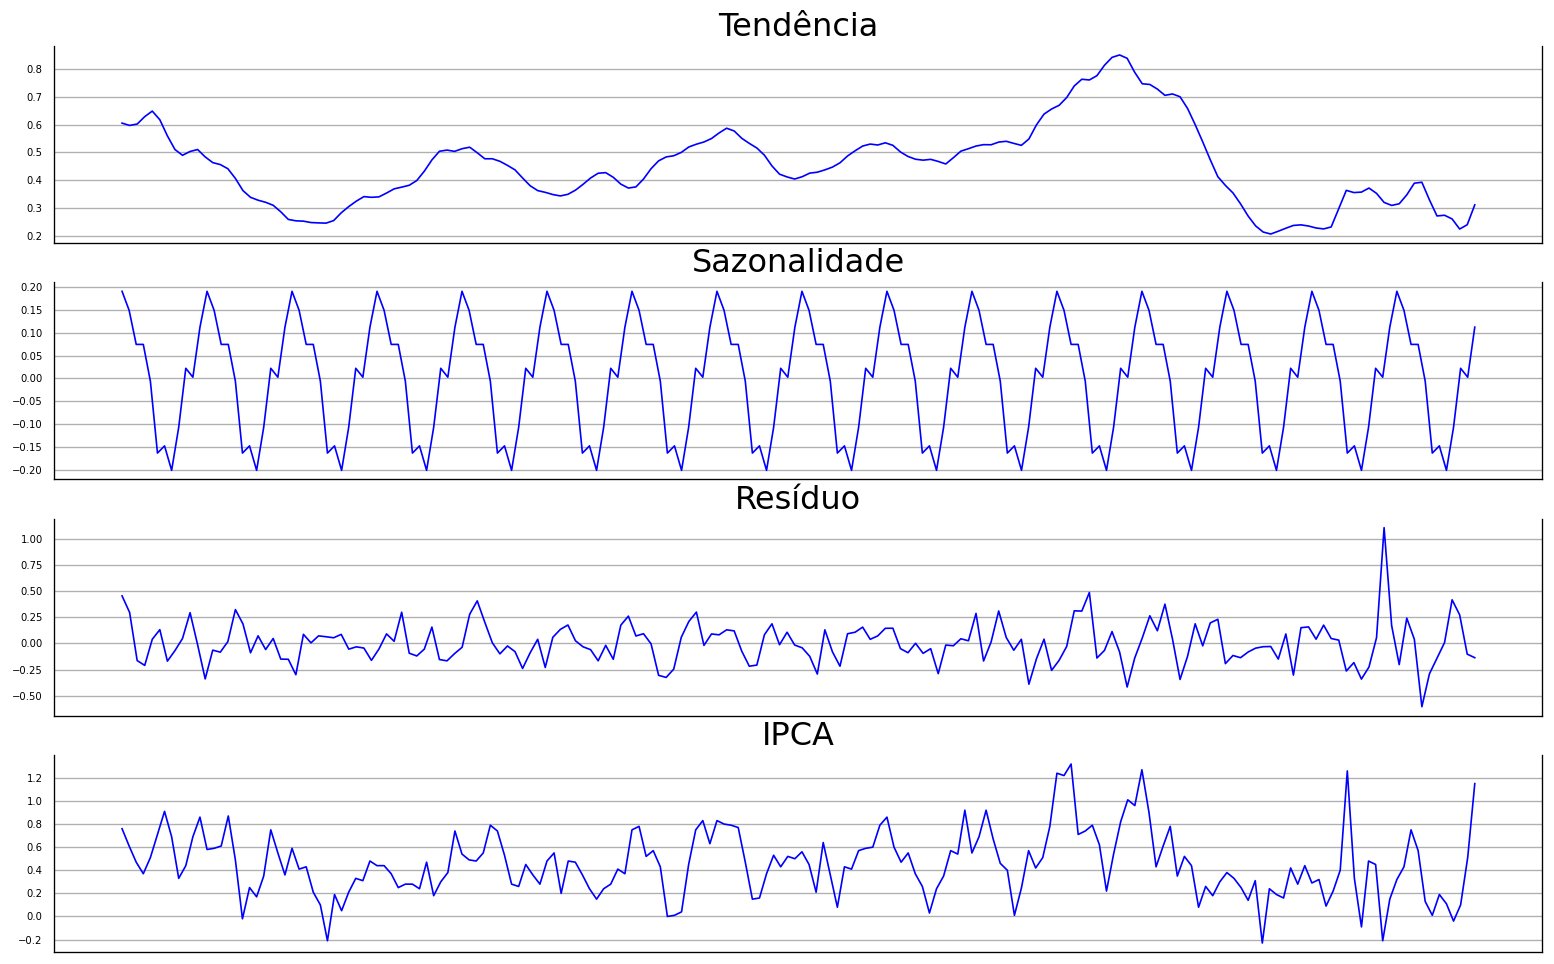

In [13]:
seas_d=sm.tsa.seasonal_decompose(serie_cluster2['ipca'],model='add',freq=12);



result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['IPCA']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()


plt.show()

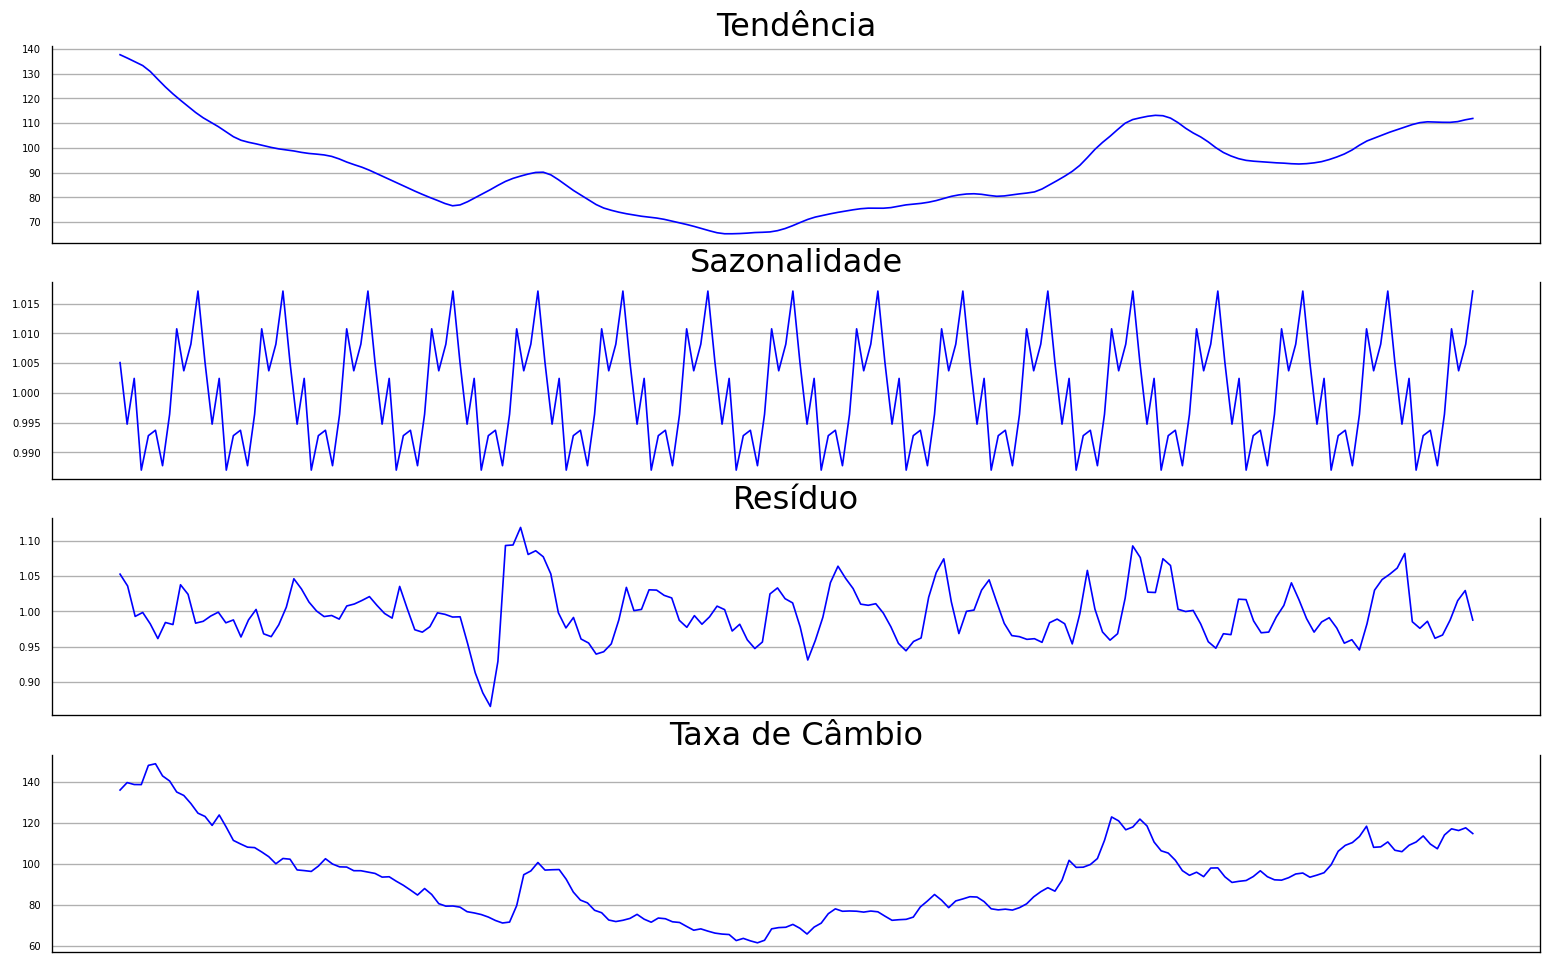

In [14]:
seas_d=sm.tsa.seasonal_decompose(serie_cluster2['taxa_cambio'],model='multiplicative',freq=12);

result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['Taxa de Câmbio']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()


plt.show()

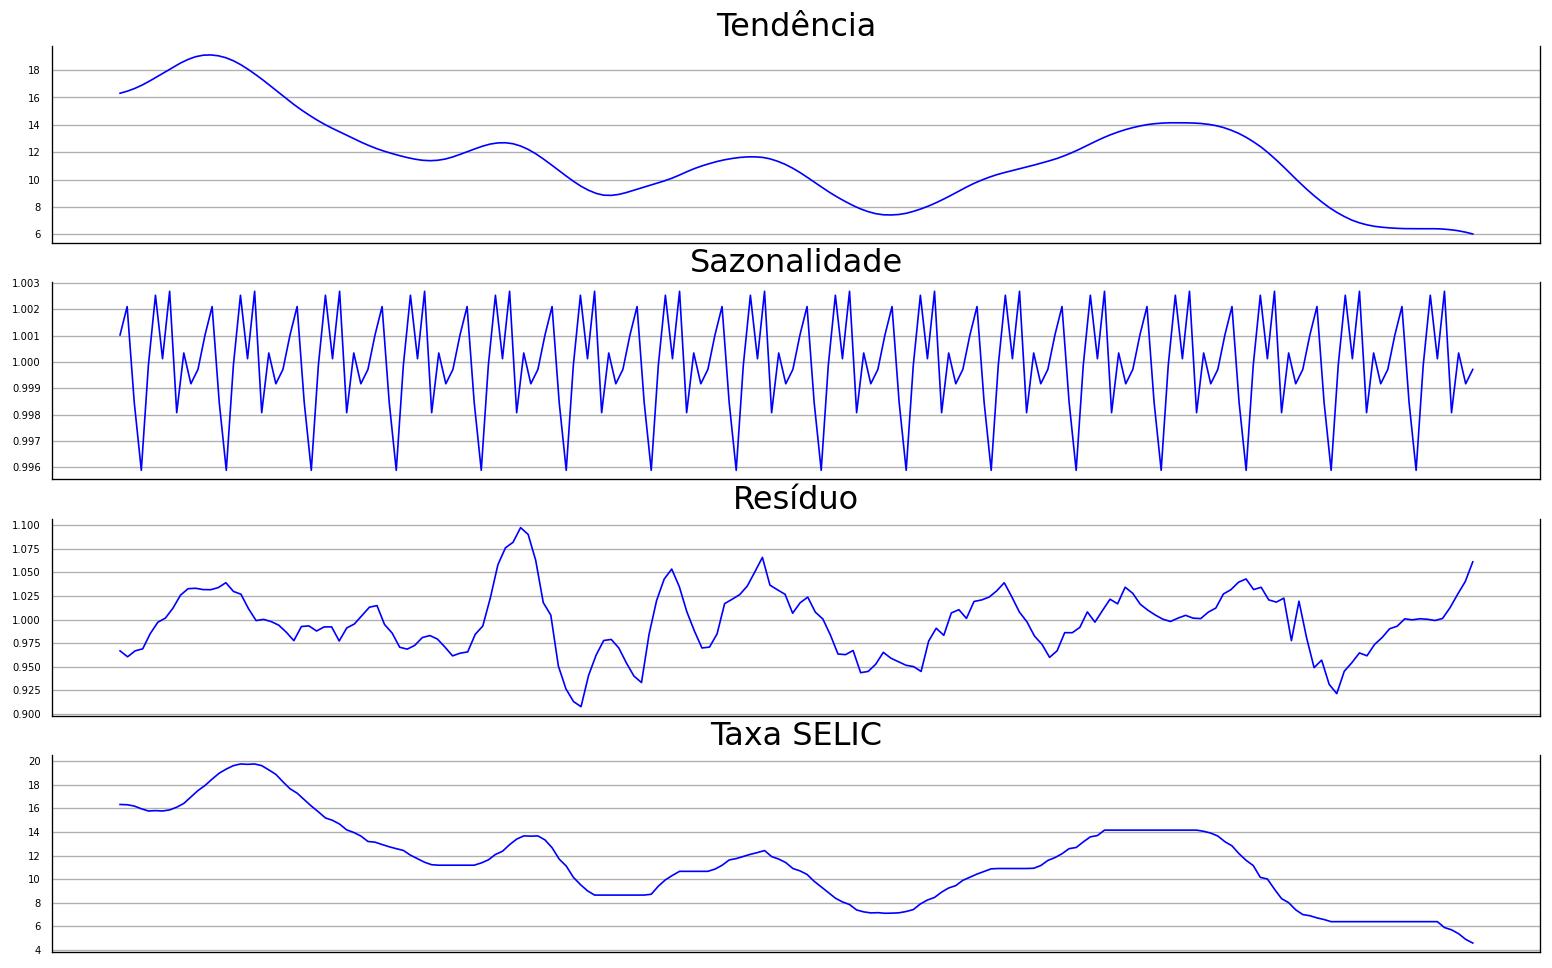

In [15]:
seas_d=sm.tsa.seasonal_decompose(serie_cluster2['taxa_selic'],model='multiplicative',freq=12);

result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['Taxa SELIC']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()


plt.show()

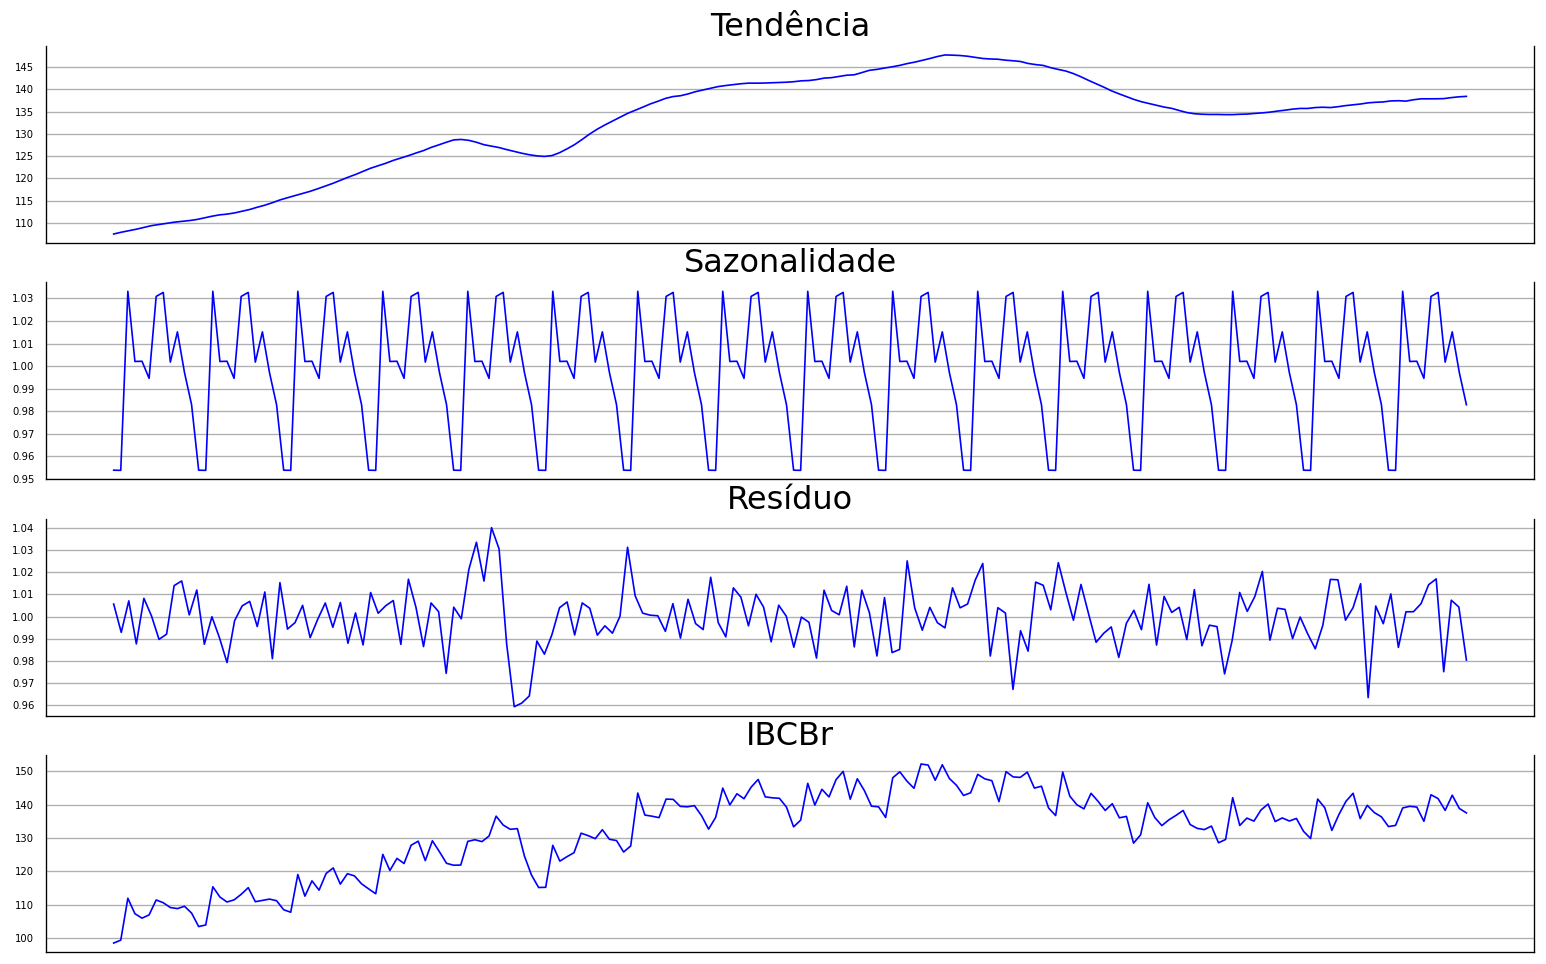

In [16]:
seas_d=sm.tsa.seasonal_decompose(serie_cluster2['ibcbr'],model='multiplicative',freq=12);

result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['IBCBr']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()


plt.show()

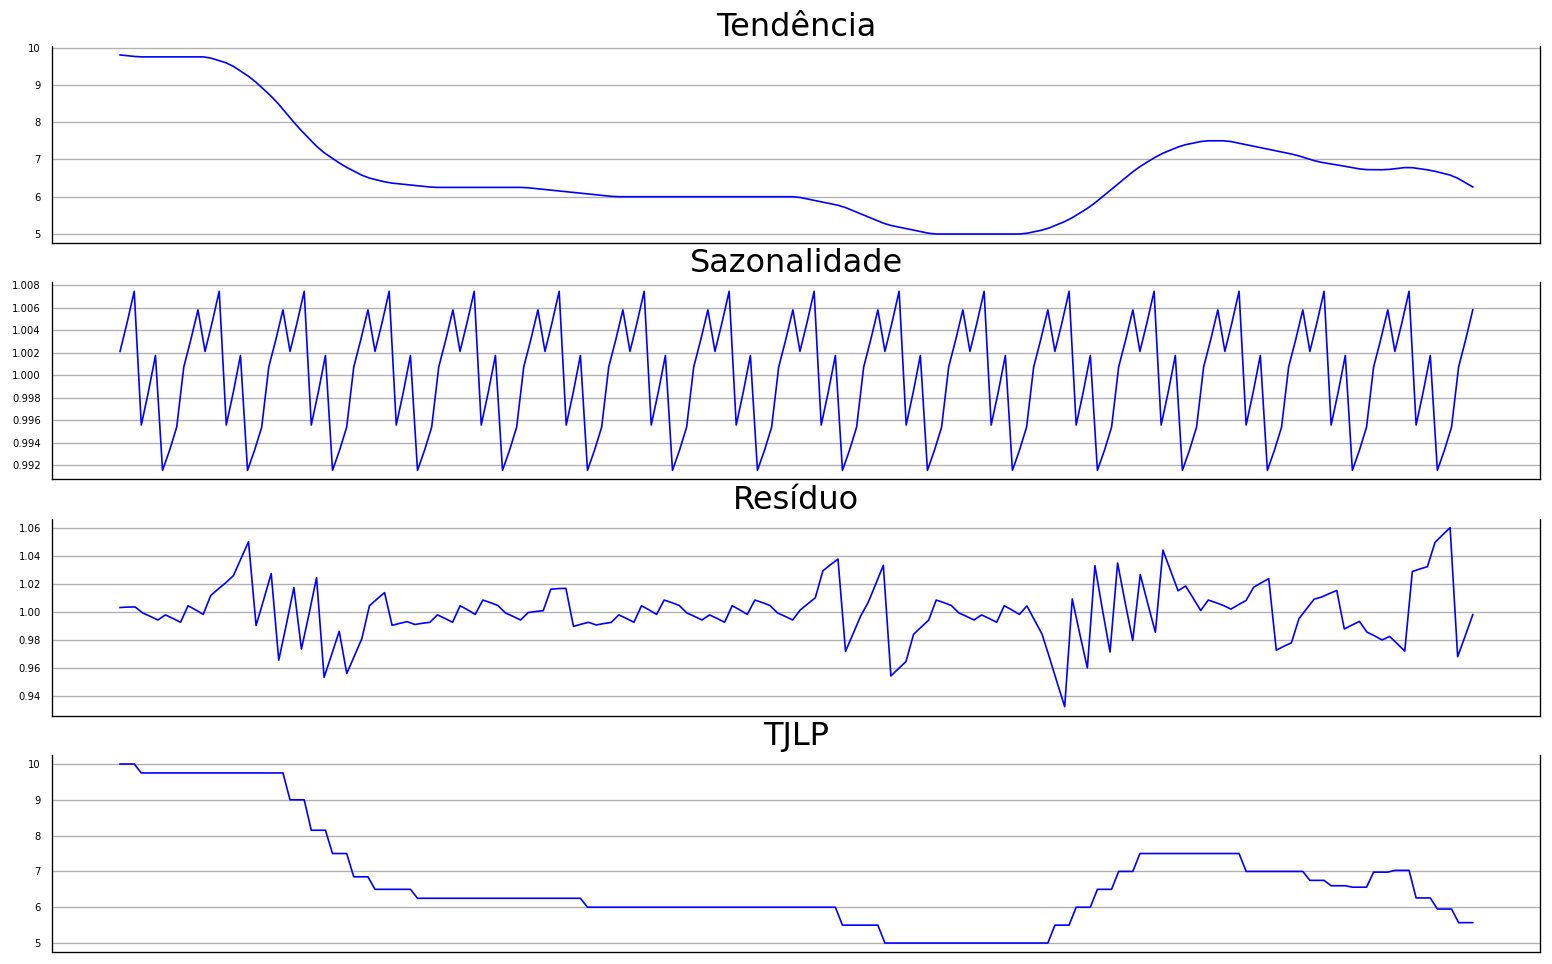

In [17]:
seas_d=sm.tsa.seasonal_decompose(serie_cluster2['tjlp'],model='multiplicative',freq=12);

result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['TJLP']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()


plt.show()

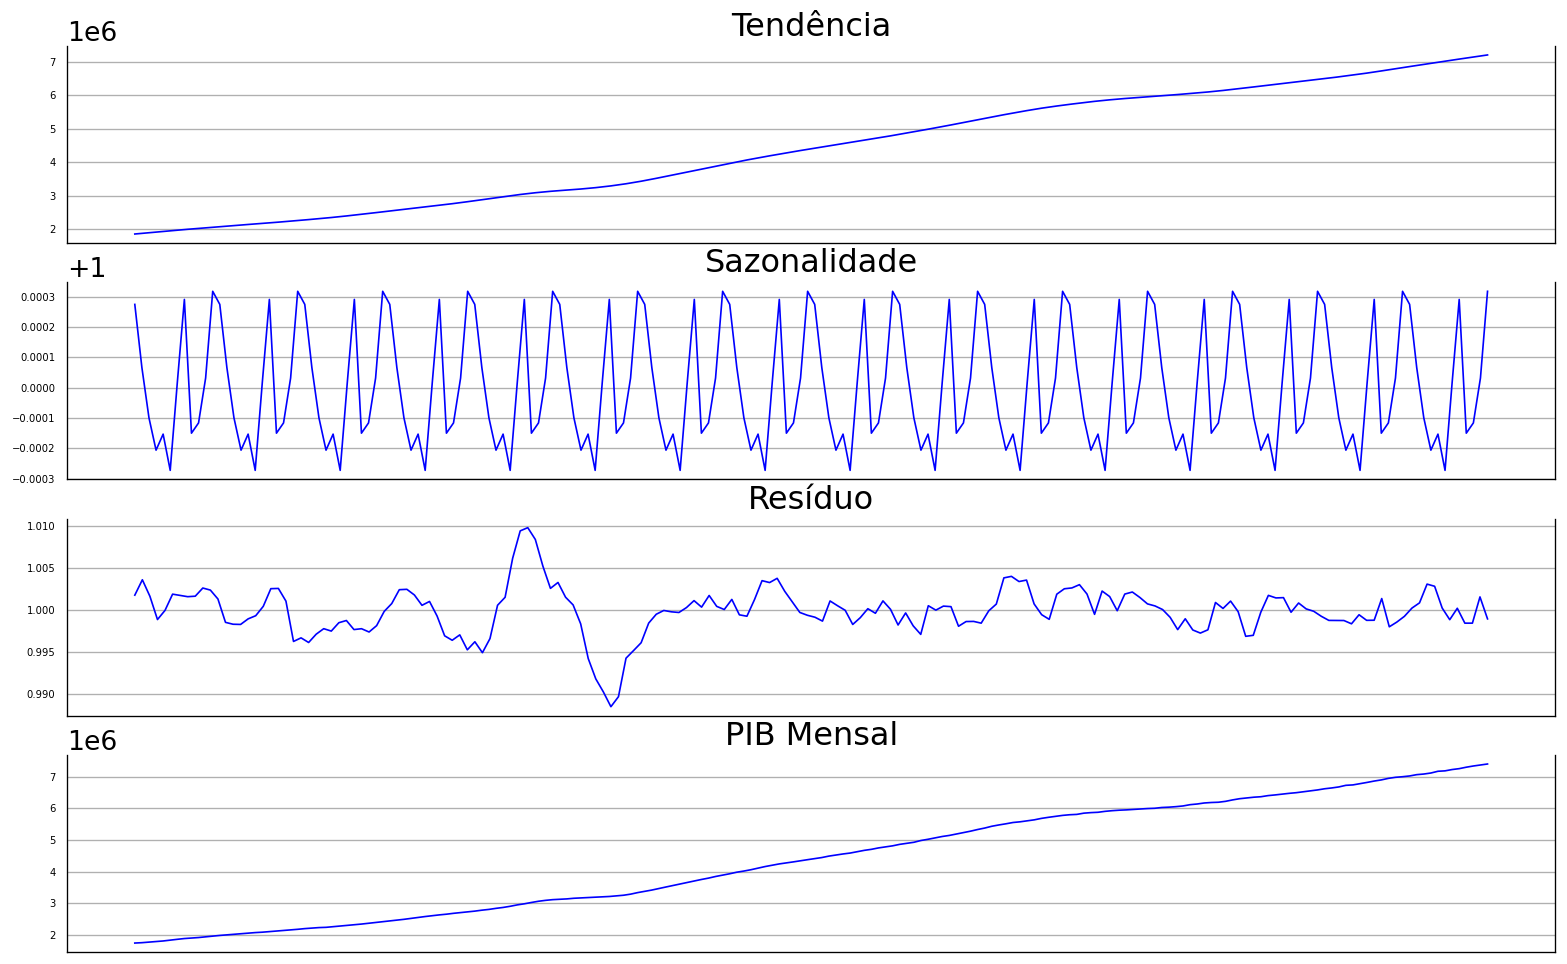

In [18]:
seas_d=sm.tsa.seasonal_decompose(serie_cluster2['pib_mensal'],model='multiplicative',freq=12);

result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['PIB Mensal']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()


plt.show()

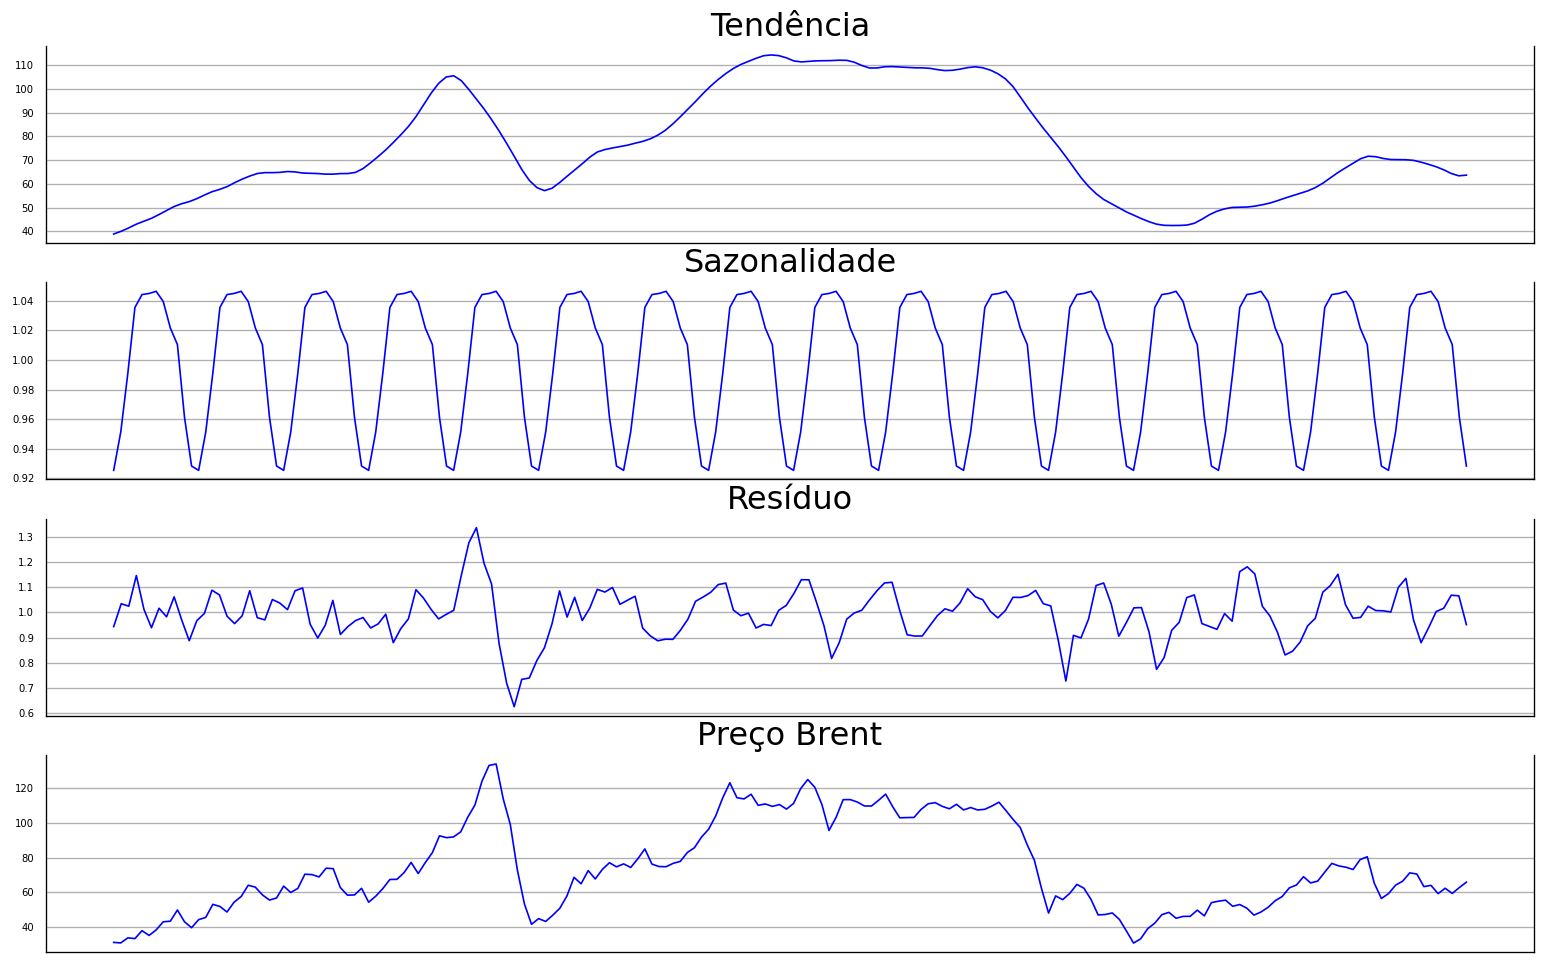

In [19]:
seas_d=sm.tsa.seasonal_decompose(serie_cluster2['preco_brent'],model='multiplicative',freq=12);

result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['Preço Brent']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()


plt.show()

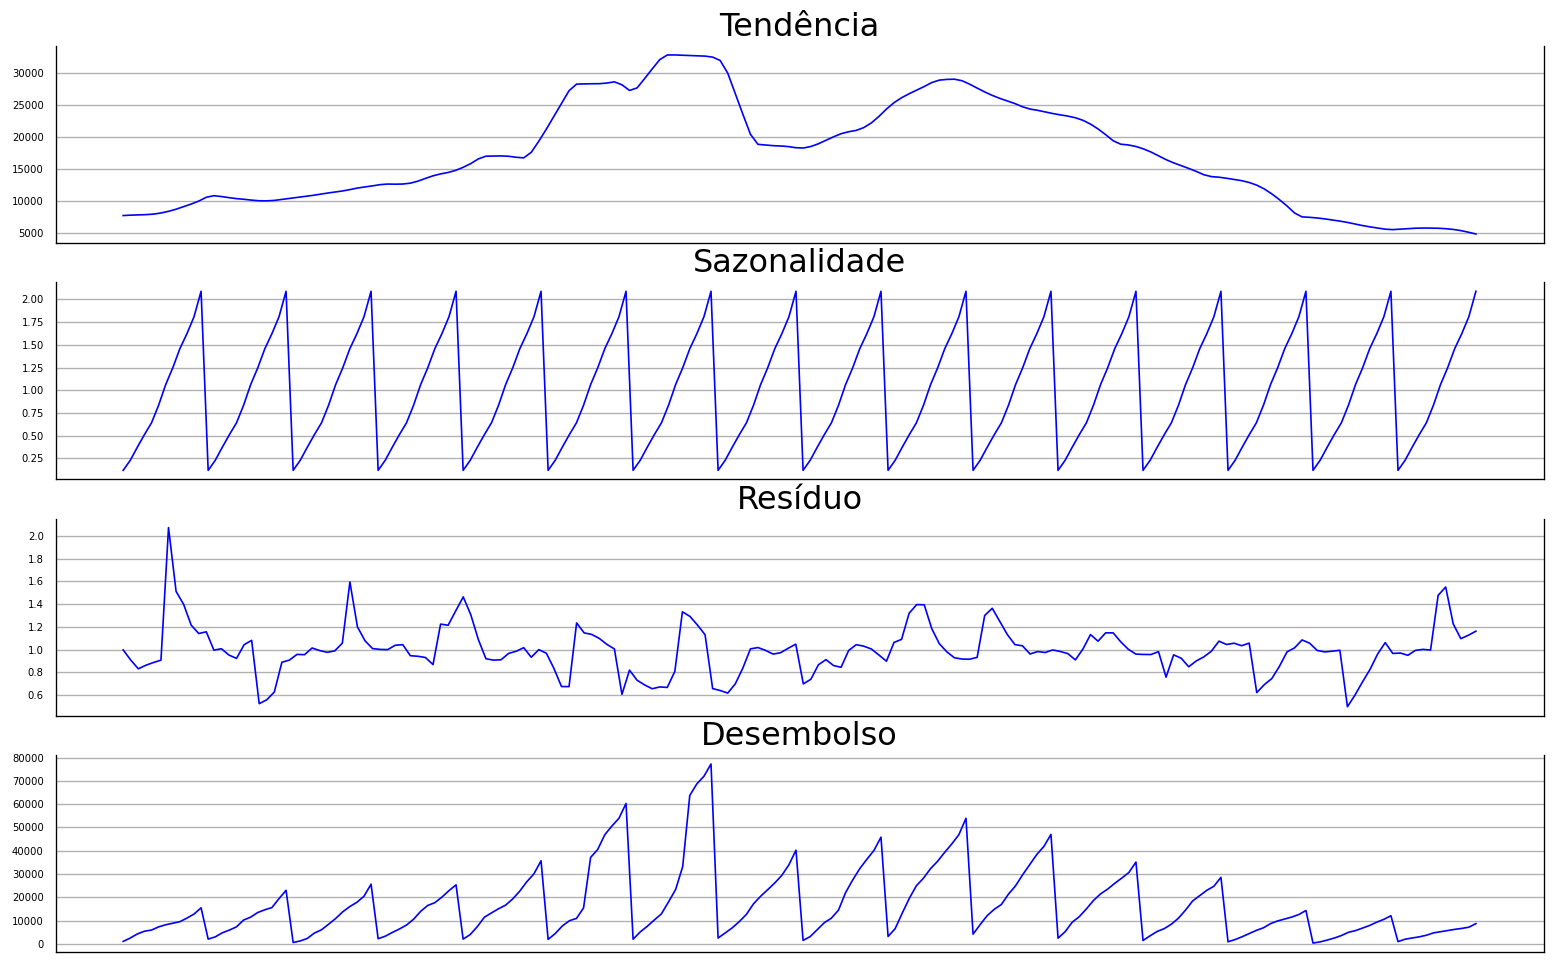

In [20]:
seas_d=sm.tsa.seasonal_decompose(serie_cluster2['desembolso'],model='multiplicative',freq=12);

result = pd.DataFrame(data= np.array(seas_d.trend), columns=['Tendência'])
result = result.append(pd.DataFrame(data= np.array(seas_d.seasonal), columns=['Sazonalidade']))
result = result.append(pd.DataFrame(data= np.array(seas_d.resid), columns=['Resíduo']))
result = result.append(pd.DataFrame(data=np.array(seas_d.observed), columns=['Desembolso']))

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    data = result[result.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # ax.set_xlabel(str(df.index))
    # Decorations
    ax.set_title(result.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(ax.get_xticks()[::12])
    ax.grid(b=True, axis='y')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.plot()


plt.show()

---

A decomposição das séries para cada variável mostra que:

a) As séries de PIB Mensal, TJLP, IBCBr, Taxa SELIC, Débitos e Arrecadação possuem tendência bastante definida o que terá impacto na especificação dos modelos ARIMA;

b) Todas as séries, na decomposição apresentaram algum grau de sazonalidade. Para confirmar as séries com sazonalidade, veremos o gráfico de sazonalidade de cada série.

---

## 4.2 Análise da sazonalidade das variáveis

---
Os gráficos mostrados a seguir apresentam a sazonalidade de cada um dos indicadores escolhidos

Créditos: https://www.kaggle.com/mobasshir/time-series-analysis

___

In [21]:
from datetime import datetime
import matplotlib as mpl
%matplotlib inline

df = pd.read_csv("datasets//dataset_cluster2.csv")

# Seleciona apenas os dados até 2019

df = df[0:192]

for i in range (0, len(df)):
    df.at[i,'mes'] = datetime.strptime(str(df.at[i,'mes']),'%Y%m')

df.head()

mes  indice_pimpf  ipca  taxa_selic  taxa_cambio   ibcbr  \
0  2004-01-01 00:00:00         104.0  0.76       16.32       136.19   98.59   
1  2004-02-01 00:00:00         103.1  0.61       16.30       139.84   99.45   
2  2004-03-01 00:00:00         113.0  0.47       16.19       138.89  111.98   
3  2004-04-01 00:00:00         107.8  0.37       15.96       138.85  107.36   
4  2004-05-01 00:00:00         108.9  0.51       15.77       148.25  106.03   

    tjlp  pib_mensal  preco_brent  desembolso       debitos   arrecadacao  
0  10.00   1735331.5        31.18      1107.0  7.309702e+08  6.709728e+09  
1  10.00   1746819.2        30.87      2559.0  4.150874e+09  5.844144e+09  
2  10.00   1765492.2        33.80      4302.0  3.778614e+09  5.757594e+09  
3   9.75   1781058.0        33.36      5474.0  4.927327e+09  7.872113e+09  
4   9.75   1800951.1        37.92      5976.0  2.175496e+09  7.156122e+09

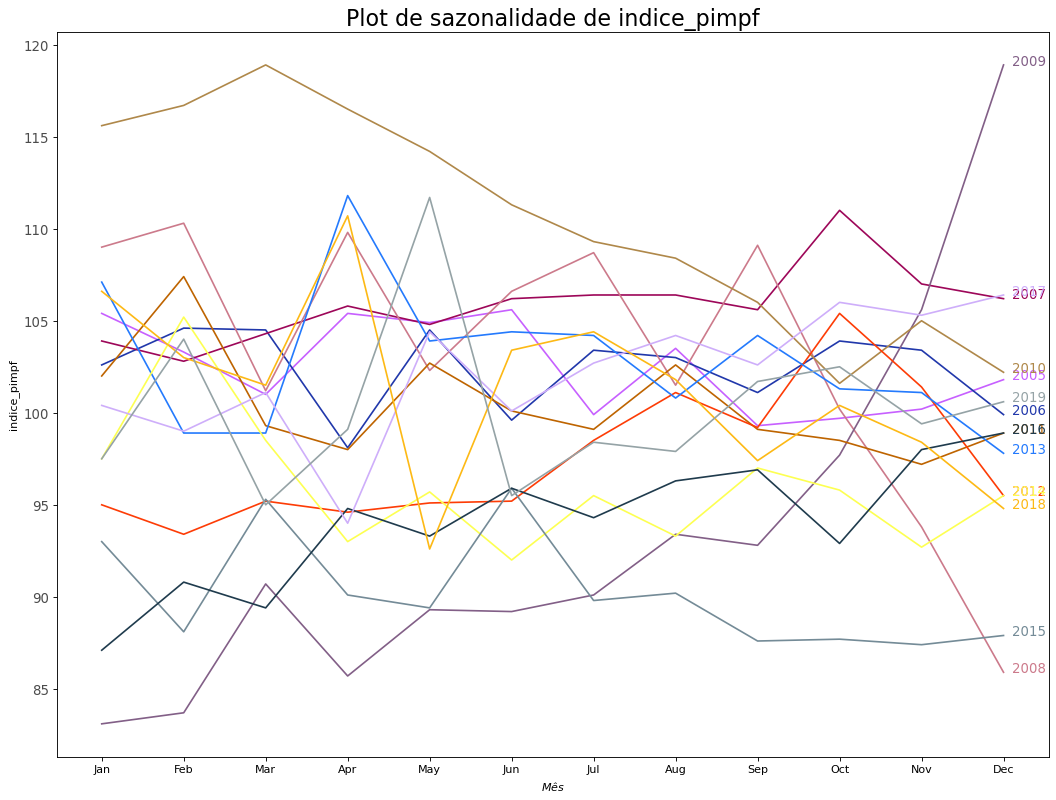

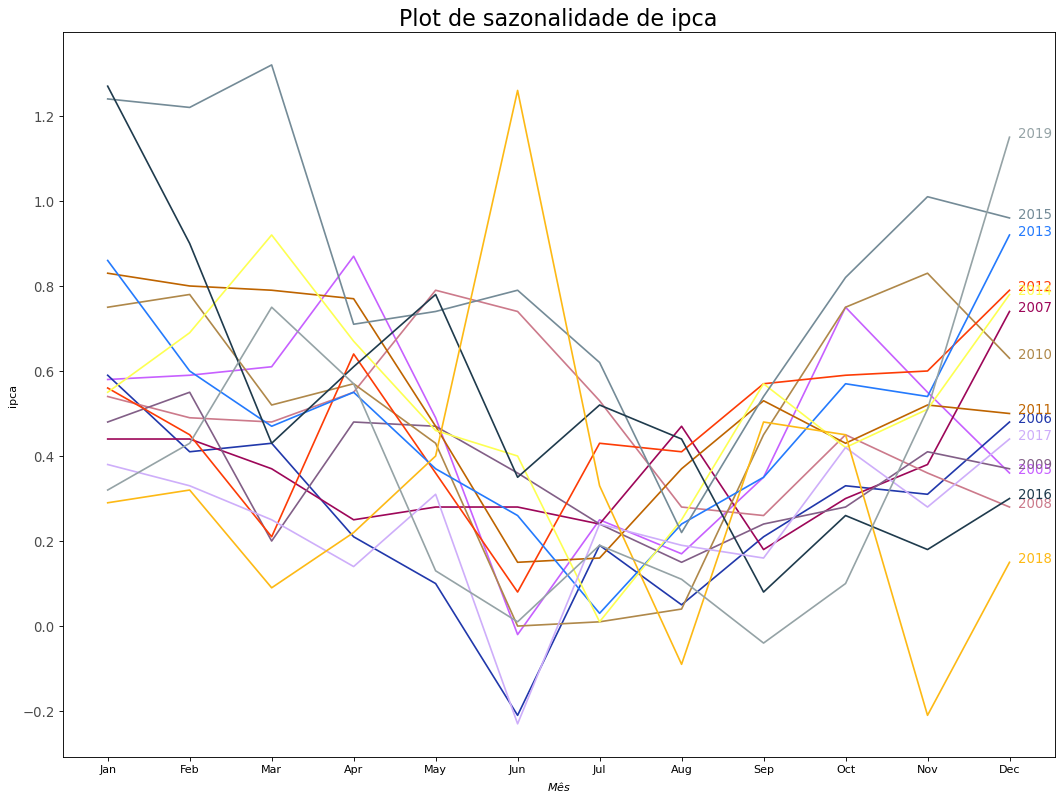

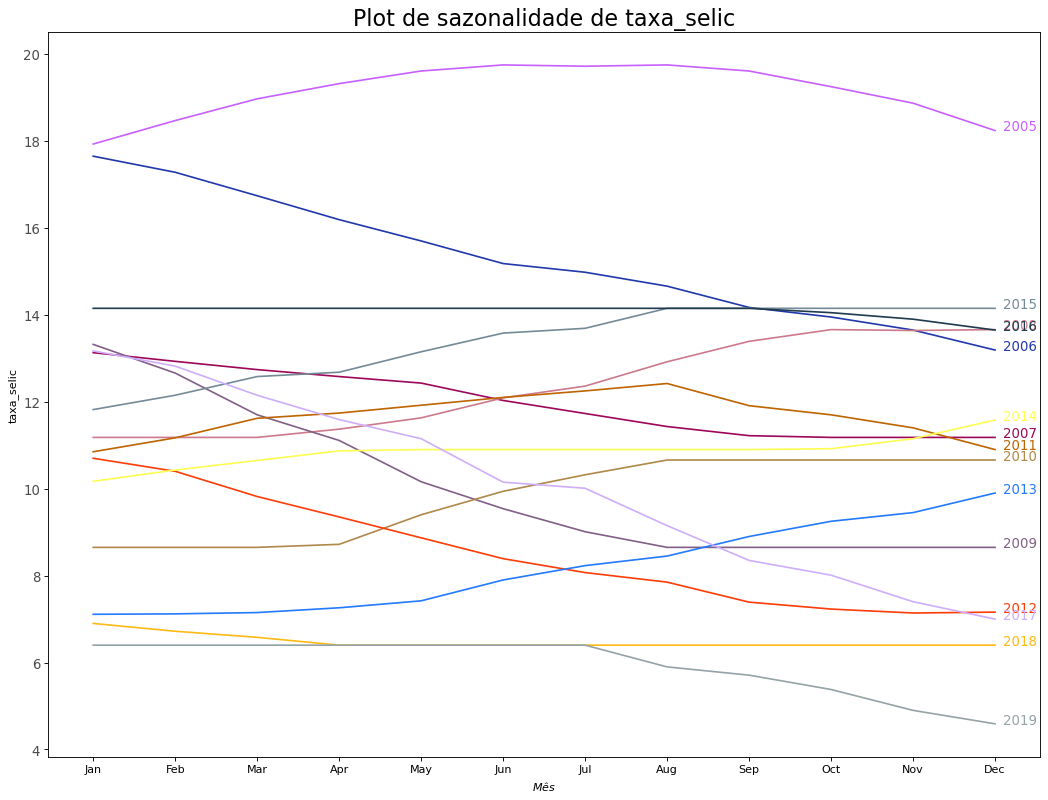

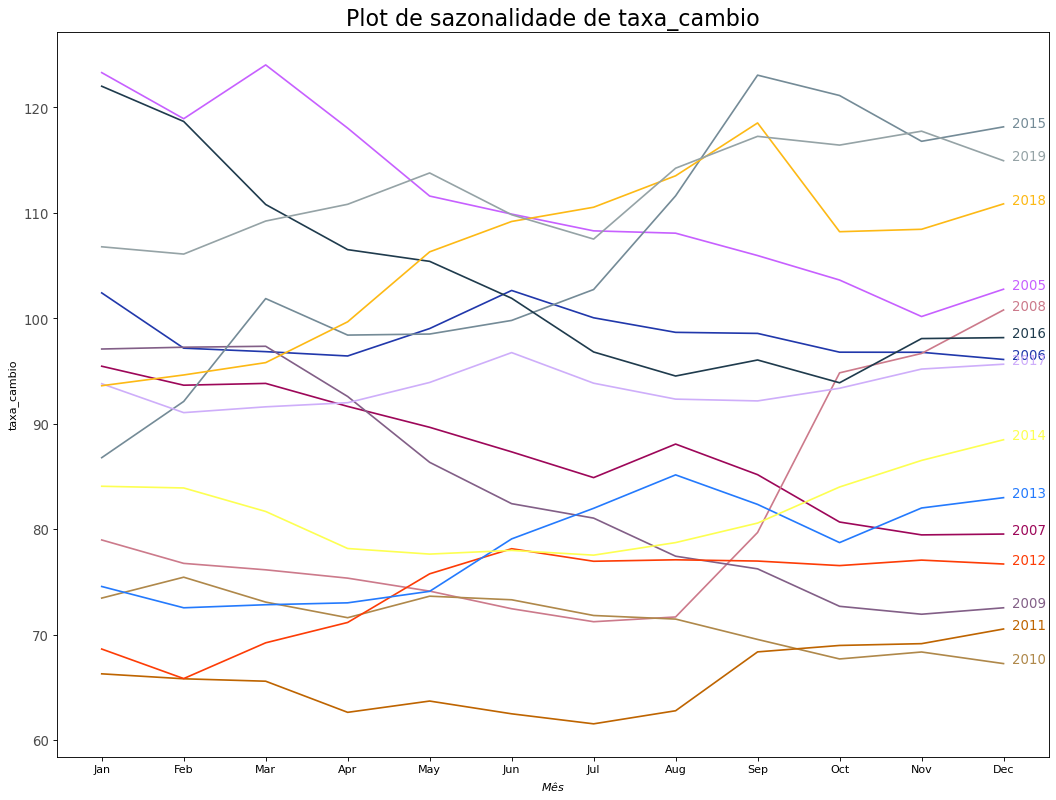

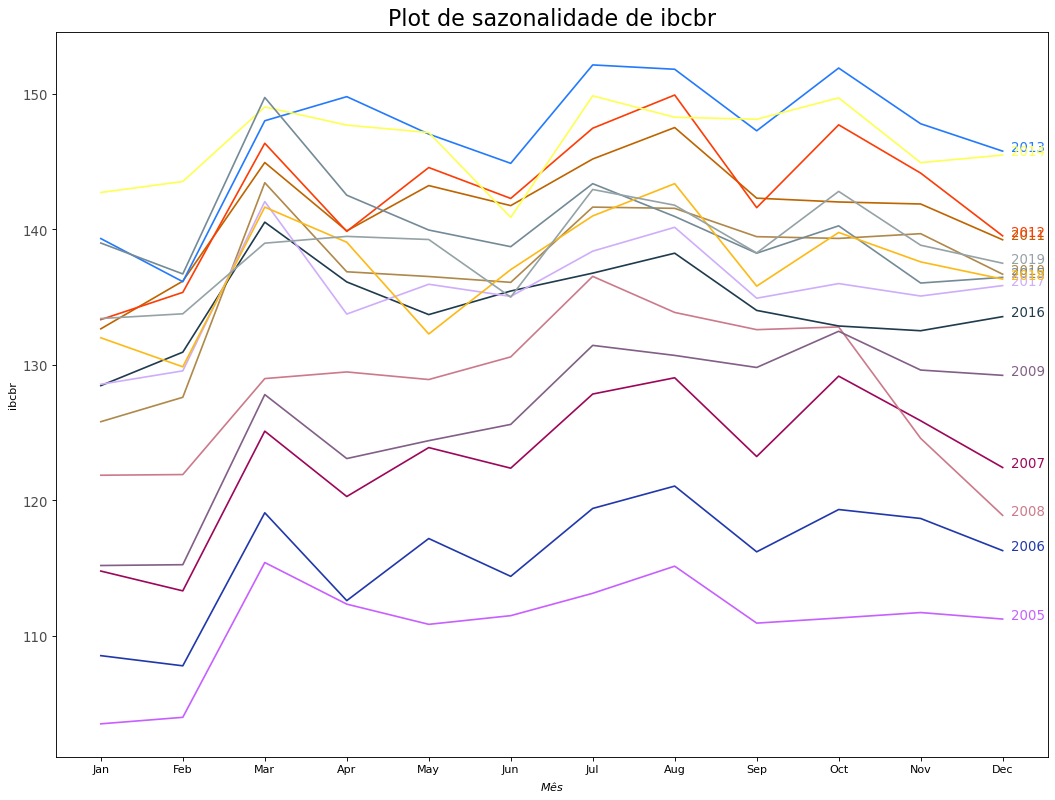

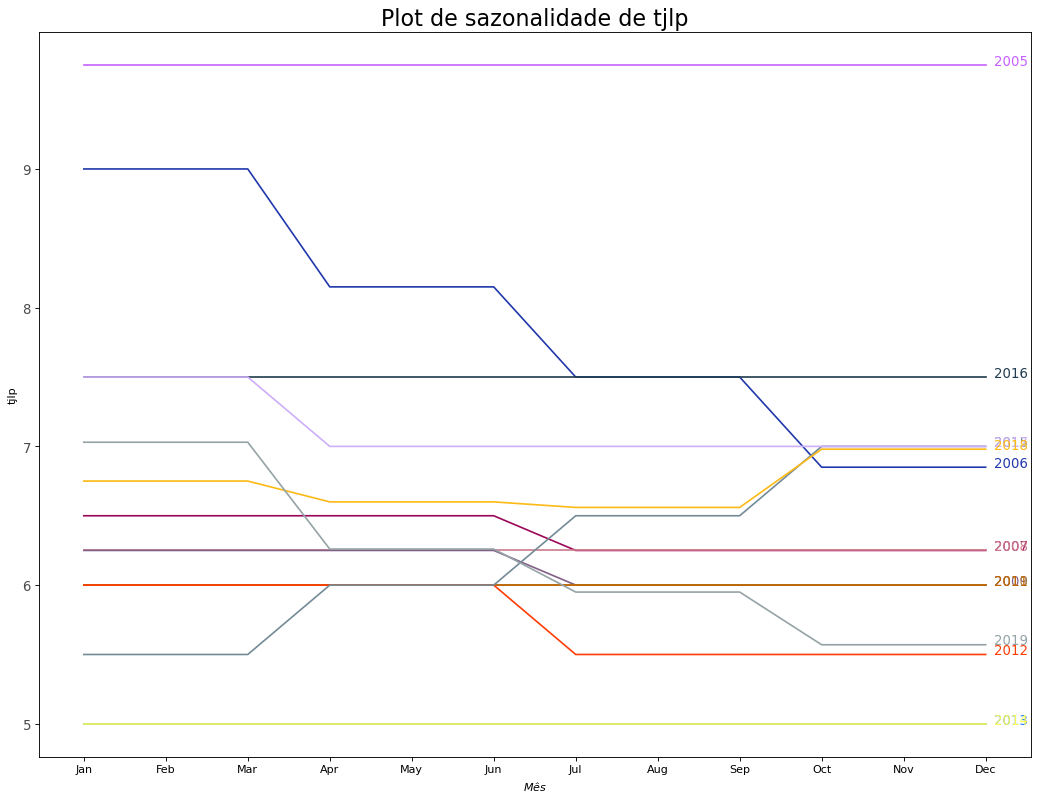

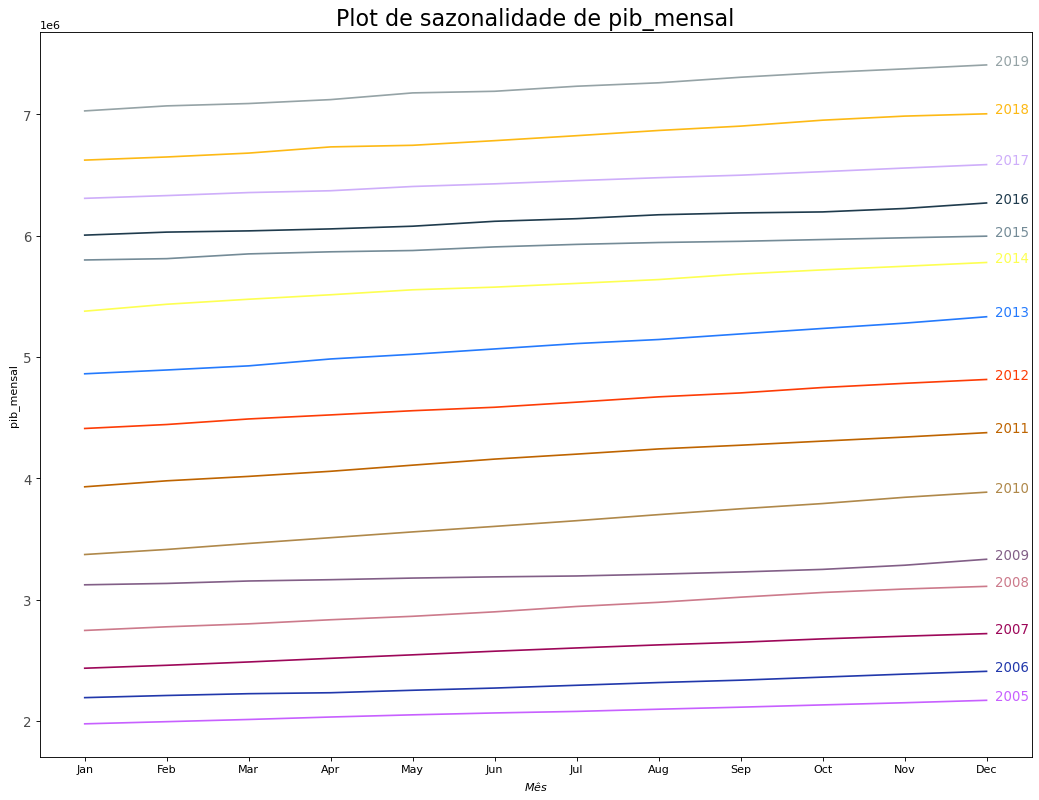

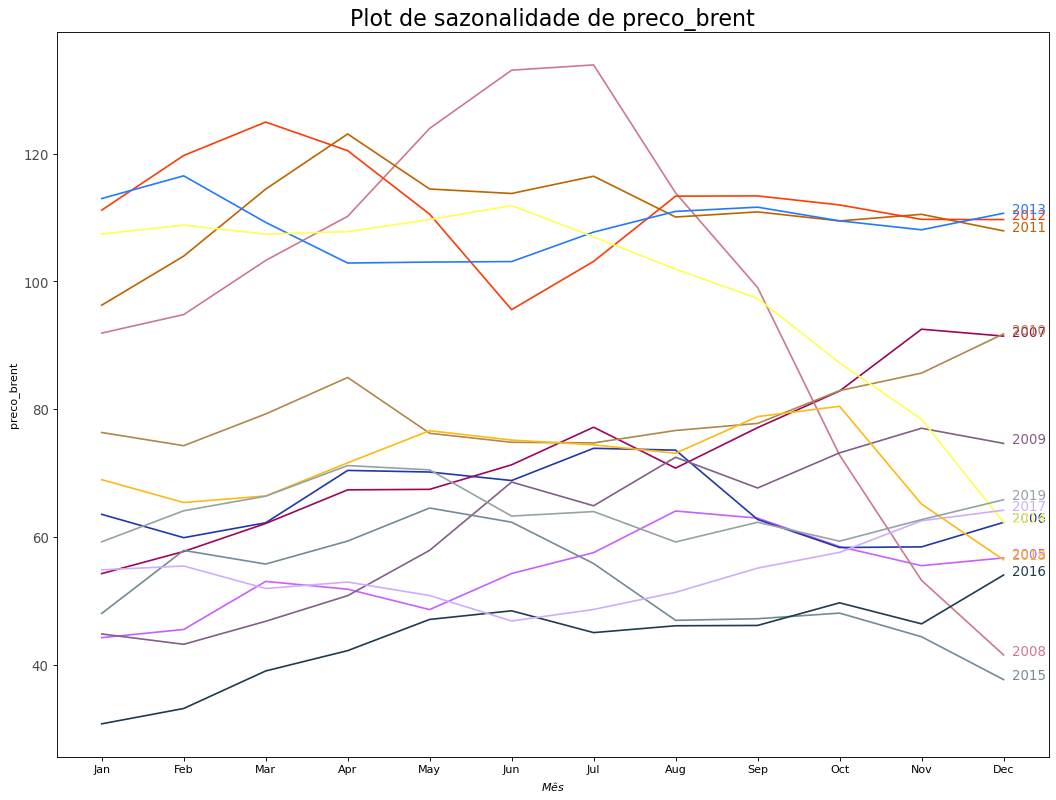

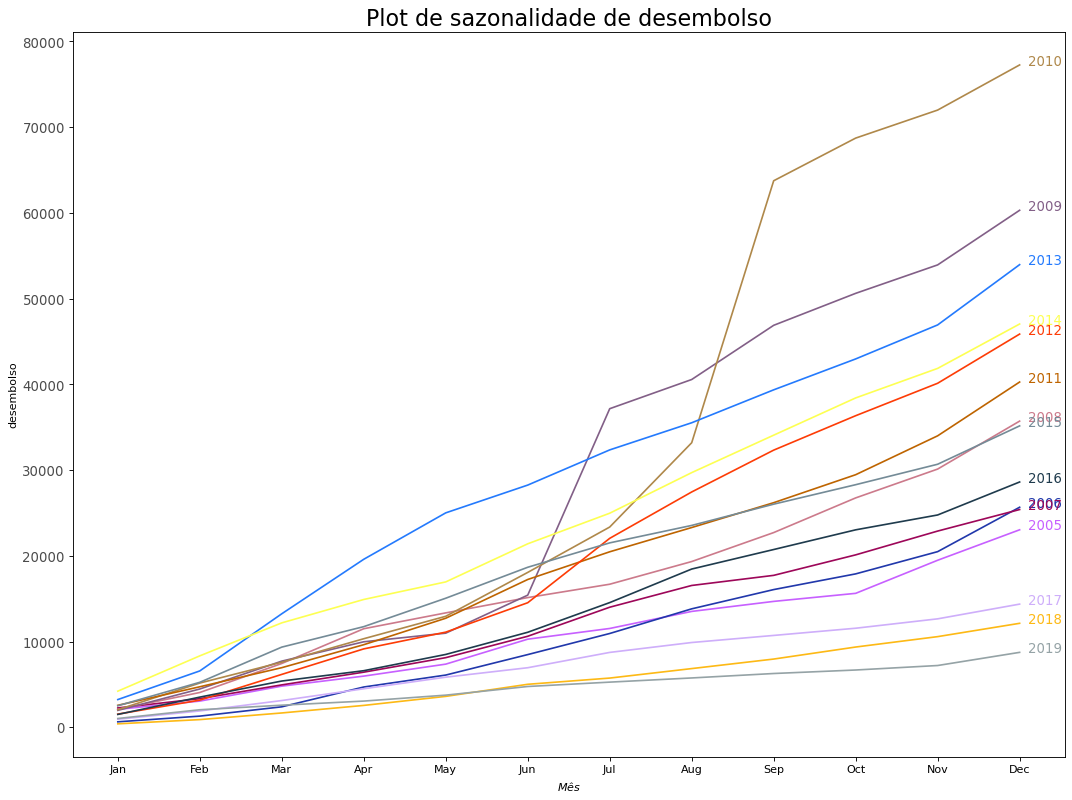

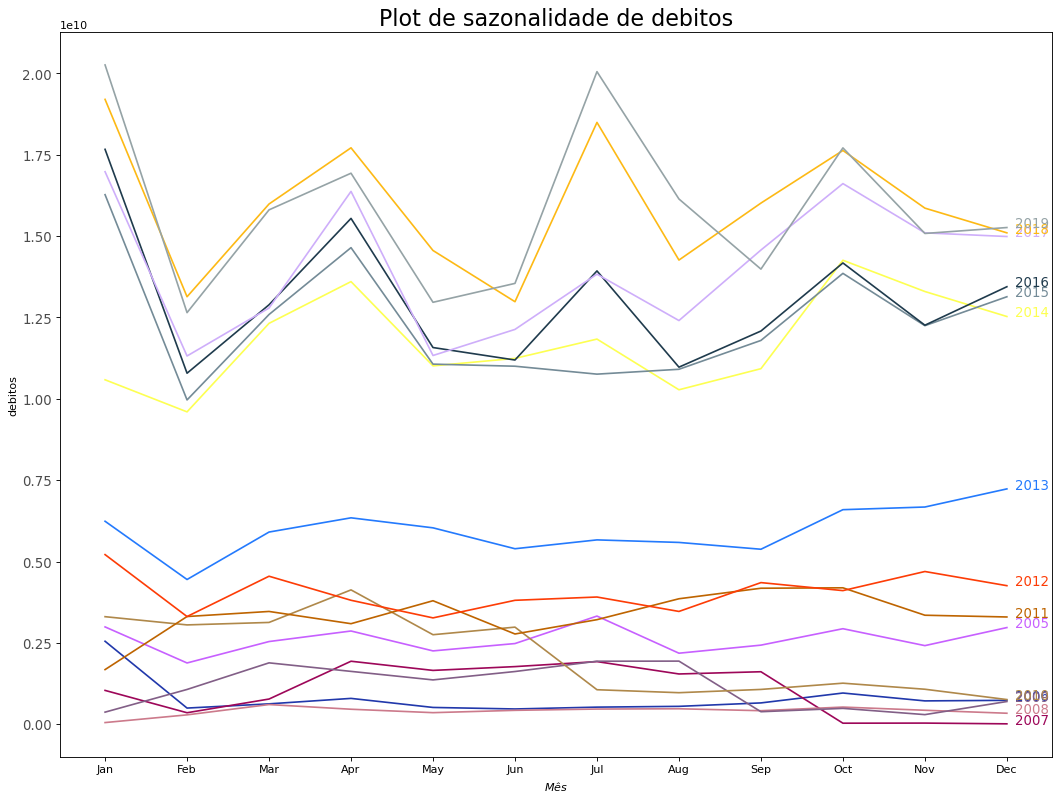

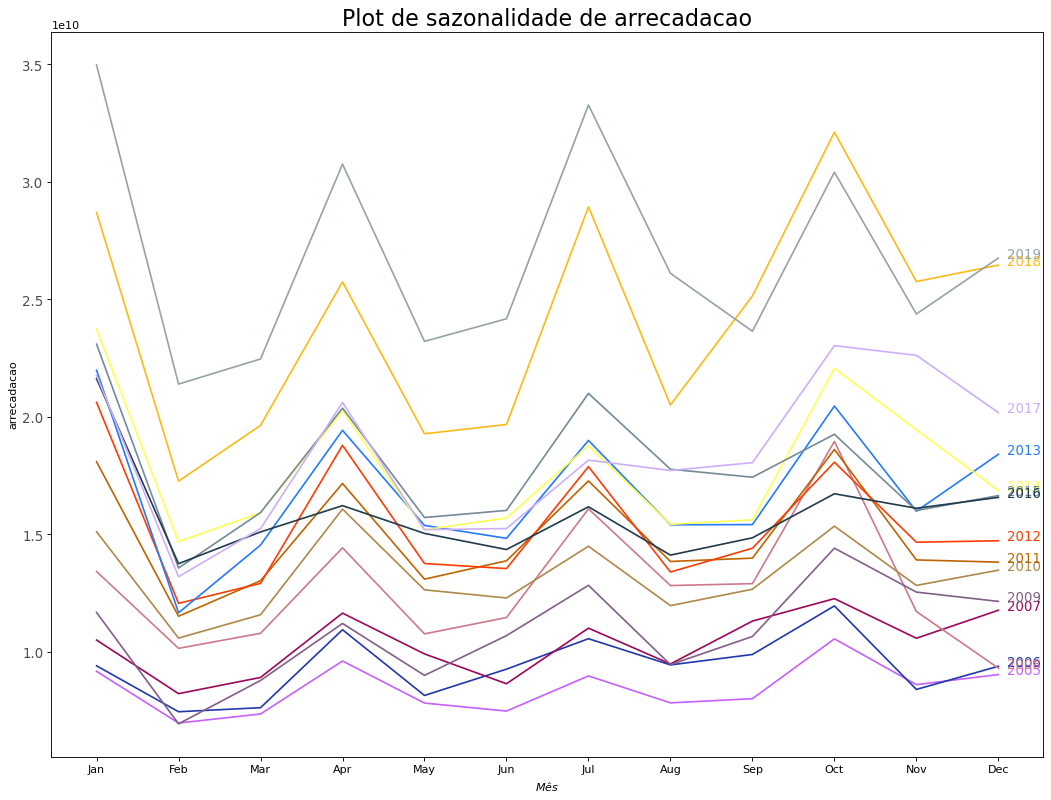

In [22]:

# Prepara os dados
df['year'] = [d.year for d in df['mes']]
df['month'] = [d.strftime('%b') for d in df['mes']]
years = df['year'].unique()

for t in df.columns:
    
    if t == 'mes':
        continue
    elif t == 'month':
        continue
    elif t == 'year':
        continue
    
    # Prepara as cores do gráfico
    np.random.seed(100)
    mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

    # Plota o gráfico
    plt.figure(figsize=(16,12), dpi= 80)
    for i, y in enumerate(years):
        if i > 0:        
            plt.plot('month', t , data=df.loc[df.year==y, :], color=mycolors[i], label=y)
            plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, t][-1:].values[0], y, fontsize=12, color=mycolors[i])

    # Legenda e rótulos
    plt.gca().set(ylabel=t, xlabel='$Mês$')
    plt.yticks(fontsize=12, alpha=.7)
    plt.title("Plot de sazonalidade de " + t, fontsize=20)
    figname = '03_02_sazonalizade_de_' + t + '.png'
    plt.savefig(figname)

    # plt.show()

### Gráficos de Sazonalidade:

### Arrecadação

![title](03_02_sazonalizade_de_arrecadacao.png)

### Débitos

![title](03_02_sazonalizade_de_debitos.png)


### IBC-Br

![title](03_02_sazonalizade_de_ibcbr.png)

### PIMPF

![title](03_02_sazonalizade_de_indice_pimpf.png)

### IPCA

![title](03_02_sazonalizade_de_ipca.png)

### Taxa de Câmbio

![title](03_02_sazonalizade_de_taxa_cambio.png)

### Taxa SELIC

![title](03_02_sazonalizade_de_taxa_selic.png)


### TJLP

![title](03_02_sazonalizade_de_tjlp.png)


### PIB Mensal

![title](03_02_sazonalizade_de_pib_mensal.png)


### Preço Brent

![title](03_02_sazonalizade_de_preco_brent.png)


### Desembolso

![title](03_02_sazonalizade_de_desembolso.png)


---



A partir dos gráficos de Sazonalidade vistos a seguir, podemos verificar que:

<ul>
     <li> As séries <b>Índice PIMPF</b>, <b>IPCA</b>, <b>Taxa de Câmbio</b>, <b>Taxa Selic</b>, <b>TJLP</b> e <b> PIB Mensal</b> e <b>Desembolso</b> não apresentam sazonalidade. </li>
    <li> As séries do <b>IBCBr</b>, <b>Débitos</b>, <b>Arrecadação</b> e <b>Preço Brent</b> apresentam sazonalidade. </li>
    
</ul>


## 4.2 Análise de estacionariedade
---
O código a seguir avalia a estacionariedade de cada série

___

In [23]:
from statsmodels.tsa.stattools import adfuller


X1 = np.array(serie_cluster2['ibcbr'])
X2 = np.array(serie_cluster2['indice_pimpf'])
X3 = np.array(serie_cluster2['ipca'])
X4 = np.array(serie_cluster2['taxa_cambio'])
X5 = np.array(serie_cluster2['taxa_selic'])
X6 = np.array(serie_cluster2['tjlp'])
X7 = np.array(serie_cluster2['pib_mensal'])
X8 = np.array(serie_cluster2['preco_brent'])
X9 = np.array(serie_cluster2['desembolso'])
X10 = np.array(serie_cluster2['arrecadacao'])
X11 = np.array(serie_cluster2['debitos'])




In [24]:
## KPSS Null hypothesis: there is a no unit root, meaning series is stationary
from statsmodels.tsa.stattools import kpss
def kpss_test(series, nome_serie, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'Estatística KPSS: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Lags: {n_lags}')
    print('Valores Críticos:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Resultado: a série {"não" if p_value < 0.05 else ""} é estacionária:' ,nome_serie)

kpss_test(X1, 'ibcbr')



Estatística KPSS: 0.901554125601055
p-value: 0.01
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série não é estacionária: ibcbr


C:\desenvolvimento\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [25]:
kpss_test(X2, 'indice_pimpf')

Estatística KPSS: 0.39839384922420495
p-value: 0.07784747878267029
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série  é estacionária: indice_pimpf


In [26]:
kpss_test(X3, 'ipca')


Estatística KPSS: 0.10241232255020176
p-value: 0.1
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série  é estacionária: ipca


C:\desenvolvimento\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [27]:
kpss_test(X4, 'taxa_cambio')


Estatística KPSS: 0.28779401751009215
p-value: 0.1
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série  é estacionária: taxa_cambio


C:\desenvolvimento\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [28]:
kpss_test(X5, 'taxa_selic')


Estatística KPSS: 0.6430596921381804
p-value: 0.018721846169256328
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série não é estacionária: taxa_selic


In [29]:
kpss_test(X6, 'tjlp')

Estatística KPSS: 0.48904837234061543
p-value: 0.04413324947283437
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série não é estacionária: tjlp


In [30]:
kpss_test(X7, 'pib_mensal')

Estatística KPSS: 1.307039435096076
p-value: 0.01
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série não é estacionária: pib_mensal


C:\desenvolvimento\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [31]:
kpss_test(X8, 'preco_brent')

Estatística KPSS: 0.21950856783888795
p-value: 0.1
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série  é estacionária: preco_brent


C:\desenvolvimento\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [32]:
kpss_test(X9, 'desembolso')

Estatística KPSS: 0.27400757995641767
p-value: 0.1
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série  é estacionária: desembolso


C:\desenvolvimento\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [33]:
kpss_test(X10, 'arrecadacao')

Estatística KPSS: 1.180430437679183
p-value: 0.01
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série não é estacionária: arrecadacao


C:\desenvolvimento\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [34]:
kpss_test(X11, 'debitos')

Estatística KPSS: 1.1480542590207767
p-value: 0.01
Lags: 15
Valores Críticos:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: a série não é estacionária: debitos


C:\desenvolvimento\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### 4.2.1 Análise da ordem de diferenciação necessária para tornar a série estacionária

In [35]:
from pmdarima.arima.utils import ndiffs

teste_diferenciacao = pd.DataFrame(columns = ['Série', 'ADF', 'KPSS','PP'])



In [36]:
# IBC-BR

teste_diferenciacao.at[0, 'Série'] = 'IBC-BR'
teste_diferenciacao.at[0, 'ADF'] = ndiffs(X1, test = 'adf')
teste_diferenciacao.at[0, 'KPSS'] = ndiffs(X1, test = 'kpss')
teste_diferenciacao.at[0, 'PP'] = ndiffs(X1, test = 'pp')

In [37]:
# Índice PIM-PF

teste_diferenciacao.at[1, 'Série'] = 'Índice PIM-PF'
teste_diferenciacao.at[1, 'ADF'] = ndiffs(X2, test = 'adf')
teste_diferenciacao.at[1, 'KPSS'] = ndiffs(X2, test = 'kpss')
teste_diferenciacao.at[1, 'PP'] = ndiffs(X2, test = 'pp')

In [38]:
# IPCA
teste_diferenciacao.at[2, 'Série'] = 'IPCA'
teste_diferenciacao.at[2, 'ADF'] = ndiffs(X3, test = 'adf')
teste_diferenciacao.at[2, 'KPSS'] = ndiffs(X3, test = 'kpss')
teste_diferenciacao.at[2, 'PP'] = ndiffs(X3, test = 'pp')


In [39]:
# Taxa Câmbio
teste_diferenciacao.at[3, 'Série'] = 'Taxa de Câmbio'
teste_diferenciacao.at[3, 'ADF'] = ndiffs(X4, test = 'adf')
teste_diferenciacao.at[3, 'KPSS'] = ndiffs(X4, test = 'kpss')
teste_diferenciacao.at[3, 'PP'] = ndiffs(X4, test = 'pp')

In [40]:
# Taxa SELIC
teste_diferenciacao.at[4, 'Série'] = 'Taxa SELIC'
teste_diferenciacao.at[4, 'ADF'] = ndiffs(X5, test = 'adf')
teste_diferenciacao.at[4, 'KPSS'] = ndiffs(X5, test = 'kpss')
teste_diferenciacao.at[4, 'PP'] = ndiffs(X5, test = 'pp')


In [41]:
# TJLP
teste_diferenciacao.at[5, 'Série'] = 'TJLP'
teste_diferenciacao.at[5, 'ADF'] = ndiffs(X6, test = 'adf')
teste_diferenciacao.at[5, 'KPSS'] = ndiffs(X6, test = 'kpss')
teste_diferenciacao.at[5, 'PP'] = ndiffs(X6, test = 'pp')

In [42]:
# PIB Mensal
teste_diferenciacao.at[6, 'Série'] = 'PIB Mensal'
teste_diferenciacao.at[6, 'ADF'] = ndiffs(X7, test = 'adf')
teste_diferenciacao.at[6, 'KPSS'] = ndiffs(X7, test = 'kpss')
teste_diferenciacao.at[6, 'PP'] = ndiffs(X7, test = 'pp')

In [43]:
# Preço Brent
teste_diferenciacao.at[7, 'Série'] = 'Preço Brent'
teste_diferenciacao.at[7, 'ADF'] = ndiffs(X8, test = 'adf')
teste_diferenciacao.at[7, 'KPSS'] = ndiffs(X8, test = 'kpss')
teste_diferenciacao.at[7, 'PP'] = ndiffs(X8, test = 'pp')

In [44]:
# Desembolsos
teste_diferenciacao.at[8, 'Série'] = 'Desembolsos'
teste_diferenciacao.at[8, 'ADF'] = ndiffs(X9, test = 'adf')
teste_diferenciacao.at[8, 'KPSS'] = ndiffs(X9, test = 'kpss')
teste_diferenciacao.at[8, 'PP'] = ndiffs(X9, test = 'pp')

In [45]:
# Arrecadação
teste_diferenciacao.at[9, 'Série'] = 'Arrecadação'
teste_diferenciacao.at[9, 'ADF'] = ndiffs(X10, test = 'adf')
teste_diferenciacao.at[9, 'KPSS'] = ndiffs(X10, test = 'kpss')
teste_diferenciacao.at[9, 'PP'] = ndiffs(X10, test = 'pp')

In [46]:
# Débitos
teste_diferenciacao.at[10, 'Série'] = 'Débitos'
teste_diferenciacao.at[10, 'ADF'] = ndiffs(X11, test = 'adf')
teste_diferenciacao.at[10, 'KPSS'] = ndiffs(X11, test = 'kpss')
teste_diferenciacao.at[10, 'PP'] = ndiffs(X11, test = 'pp')

In [47]:
teste_diferenciacao

Série ADF KPSS PP
0           IBC-BR   1    1  0
1    Índice PIM-PF   0    1  0
2             IPCA   0    0  0
3   Taxa de Câmbio   1    1  1
4       Taxa SELIC   1    1  1
5             TJLP   2    1  1
6       PIB Mensal   2    2  1
7      Preço Brent   1    1  1
8      Desembolsos   0    0  0
9      Arrecadação   1    1  0
10         Débitos   1    1  0

## 4.1 Análise da causalidade de Granger

---
A tabela exibida a seguir mostra a causalidade de Granger entre as séries. A causalidade de Granger indica, na prática quais as séries que influenciam uma determinada a previsão de uma determinada série. Isso implica que a melhor previsão de uma determinada série é resultado de seus valores passados e dos valores passados das outras séries cuja causalidade de Granger foi confirmada.

O teste de causalidade de Granger tem como hipótese nula que os coeficientes de regressão de determinada série em relação à série testada são zero, ou seja, não influenciam a série em teste (série _y).

Créditos: https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6
___

In [48]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12 #becuase we got this value before. We are not suppose to add 1 to it
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

o = grangers_causation_matrix(serie_cluster2, variables = serie_cluster2.columns)  

In [49]:
def style_reject(v, props=''):
    return props if v < 0.05 else None


s2 = o.style.applymap(style_reject, props='color:green;').applymap(lambda v: 'opacity: 20%;'if (v > 0.05 or v == 1) else None )

s2


## 5. Conclusões

---

As características encontradas nas séries temporais em análise (não estacionárias, com sazonalidade e com causalidade de Granger) permitem o uso de uma gama considerável de modelos de ML para previsão.

Na sequência do trabalho, utilizarei um modelo Auto-Arima como base, utilizando apenas a variável arrecadação, o Auto-Arima com variáveis exógenas, e em seguida, uma implementação do modelo SARIMAX com variáveis exógenas (os indicadores macroeconômicos) e uma rede neural recorrente LSTM, comparando os resultados. 

___